# Regresión Logística (Hito 2 y 3)

### Indice


- [1. Librerías](#1-librerías)
- [2. Carga de los datos de test y train.](#2-carga-de-los-datos-de-test-y-train)
- [3. Regresión Logística](#3-regresión-logística)
    - [3.1 Entrenamiento del modelo](#31-entrenamiento-del-modelo)
    - [3.2 Métricas de rendimiento globales (accuracy, precision, recall, F1)](#32-métricas-de-rendimiento-globales-accuracy-precision-recall-f1)
    - [3.3 Matriz de confusión (análisis detallado de aciertos y errores por clase).](#33-matriz-de-confusión-análisis-detallado-de-aciertos-y-errores-por-clase)
    - [📑 Análisis del Modelo de Regresión Logística (con matriz de confusión normalizada)](#análisis-del-modelo-de-regresión-logística-con-matriz-de-confusión-normalizada)
    - [3.4 Coeficientes del modelo](#34-coeficientes-del-modelo)
    - [3.5 Curva ROC - AUC](#35-curva-roc---auc)
    - [Análisis de la Curva ROC Multiclase](#análisis-de-la-curva-roc-multiclase)
    - [3.6 Visualización de la frontera de decisión 2D (limitaciones de linealidad).](#36-visualización-de-la-frontera-de-decisión-2d-limitaciones-de-linealidad)
    - [3.4 Análisis de la Frontera de Decisión (2D)](#34-análisis-de-la-frontera-de-decisión-2d)
  - [4. Distribución de clases en train y test](#4-distribución-de-clases-en-train-y-test)
    - [4.1Análisis:](#41análisis)
    - [Interpretación del DataFrame de Distribución de Clases](#interpretación-del-dataframe-de-distribución-de-clases)
    - [4.2 Manejo del desvalanceo de clases.](#42-manejo-del-desvalanceo-de-clases)
    - [4.3 Guardar los conjuntos balanceados en PKL con nombres distintos](#43-guardar-los-conjuntos-balanceados-en-pkl-con-nombres-distintos)
    - [4.4 Visualizar la distribución final](#44-visualizar-la-distribución-final)
    - [4 Justificación metodológica del manejo del desbalanceo de clases](#4-justificación-metodológica-del-manejo-del-desbalanceo-de-clases)
- [5. Entrenamiento del Modelo Parámetros Default: test / train oversampled](#5-entrenamiento-del-modelo-parámetros-default-test-train-oversampled)
    - [5.1 Carga de los Pkl balanceados](#51-carga-de-los-pkl-balanceados)
    - [5.2 Entrenamiento del modelo](#52-entrenamiento-del-modelo)
    - [5.3 Evaluación del modelo](#53-evaluación-del-modelo)
    - [📊 5.3 Comparación de Modelos: Datos Balanceados vs. No Balanceados](#53-comparación-de-modelos-datos-balanceados-vs-no-balanceados)
    - [Análisis de Fronteras de Decisión con Datos Balanceados y No Balanceados](#análisis-de-fronteras-de-decisión-con-datos-balanceados-y-no-balanceados)
- [5. Conclusión Final: Modelo de Regresión Logística (Oversampled - Baseline)](#5-conclusión-final-modelo-de-regresión-logística-oversampled---baseline)
    - [1. Rendimiento global sobre el conjunto de prueba](#1-rendimiento-global-sobre-el-conjunto-de-prueba)
    - [2. Matriz de confusión](#2-matriz-de-confusión)
    - [3. Coeficientes principales por clase](#3-coeficientes-principales-por-clase)
    - [4. Curvas ROC y AUC por clase](#4-curvas-roc-y-auc-por-clase)
    - [Conclusión general](#conclusión-general)
- [6. Modelo con Hiperparámetros](#6-modelo-con-hiperparámetros)
    - [6.1 Definir hiperparámetros y cross-validation](#61-definir-hiperparámetros-y-cross-validation)
    - [6.2 Entrenamiento del Grid Search sobre train oversampled](#62-entrenamiento-del-grid-search-sobre-train-oversampled)
    - [Resultados del Grid Search: Regresión Logística](#resultados-del-grid-search-regresión-logística)
    - [Evaluación del Modelo de Regresión Logística Multiclase](#evaluación-del-modelo-de-regresión-logística-multiclase)
    - [Interpretación](#interpretación)
    - [Variables más influyentes por clase](#variables-más-influyentes-por-clase)
    - [Análisis de Curvas ROC y AUC por clase](#análisis-de-curvas-roc-y-auc-por-clase)
  - [Hallazgos y conclusión final](#hallazgos-y-conclusión-final)
    - [Hallazgos](#hallazgos)
    - [Conclusión final](#conclusión-final)
    - [6.6 Frontera de Decisión 2D con Mejores Hiperparámetros](#66-frontera-de-decisión-2d-con-mejores-hiperparámetros)
- [7. Comparacion de los modelos: parámetros de fábrica vs hiperparámetros](#7-comparacion-de-los-modelos-parámetros-de-fábrica-vs-hiperparámetros)
    - [7.1 Carga de los modelos](#71-carga-de-los-modelos)
    - [7.2 Verificación de consistencia](#72-verificación-de-consistencia)
    - [7.3 Evaluacion de los modelos](#73-evaluacion-de-los-modelos)
    - [Comparación de Modelos de Regresión Logística (8 clases)](#comparación-de-modelos-de-regresión-logística-8-clases)
    - [Comparación de Modelos de Regresión Logística (8 clases)](#comparación-de-modelos-de-regresión-logística-8-clases)
    - [Análisis de resultados de Coeficientes de los Modelos](#análisis-de-resultados-de-coeficientes-de-los-modelos)
    - [Consideraciones Finales](#consideraciones-finales)
  - [Comparación de ROC-AUC: Modelo Default vs Modelo con Hyperparámetros](#comparación-de-roc-auc-modelo-default-vs-modelo-con-hyperparámetros)
    - [1. Contexto](#1-contexto)
    - [2. Resultados](#2-resultados)
    - [3. Interpretación](#3-interpretación)
    - [4. Conclusión](#4-conclusión)
- [Carpetas de resultados](#carpetas-de-resultados)
- [Generar fronteras completas](#generar-fronteras-completas)
    - [Visualización de la Frontera de Decisión 2D](#visualización-de-la-frontera-de-decisión-2d)
- [Selección de las 2 features más importantes](#selección-de-las-2-features-más-importantes)
- [Graficar](#graficar)
    - [Análisis del Gráfico](#análisis-del-gráfico)
- [8 Conclusión Final](#8-conclusión-final)

## 1. Librerías

In [ ]:
# ==========================================================
# 📦 Librerías estándar de Python
# ==========================================================
import warnings
import time
import os
import pickle
from collections import Counter
import json
# Ignorar warnings innecesarios
warnings.filterwarnings("ignore")

# ==========================================================
# 🔢 Ciencia de Datos y Manipulación
# ==========================================================
import numpy as np
import pandas as pd

from tabulate import tabulate  
# ==========================================================
# 📊 Visualización
# ==========================================================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

# Configuración estética
sns.set(style="whitegrid")
%matplotlib inline

# ==========================================================
# 🤖 Machine Learning (scikit-learn)
# ==========================================================
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, classification_report
)
from sklearn.utils import resample

# ==========================================================
# ⚖️ Manejo de Desbalance de Clases
# ==========================================================
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# ==========================================================
# 💾 Guardado y Carga de Modelos
# ==========================================================
import joblib
import pickle

## 2. Carga de los datos de test y train.

##### Esto reemplaza la necesidad de cargar el data_ML.csv y repetir el train_test_split y el StandardScaler.

In [2]:
# Cargar los datos ya listos desde los archivos .pkl
print("Carga de los conjuntos de datos de entrenamiento y prueba desde archivos .pkl...")

X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

print("¡Datos cargados con éxito! Se comienza el entrenamiento.")

# Se Revisa las dimensiones para confirmar que todo se cargó bien
print("\nForma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

Carga de los conjuntos de datos de entrenamiento y prueba desde archivos .pkl...
¡Datos cargados con éxito! Se comienza el entrenamiento.

Forma de X_train: (1983, 22)
Forma de X_test: (496, 22)


# 3. Regresión Logística

### 3.1 Entrenamiento del modelo

In [3]:
# Instanciación del modelo de Regresión Logística con parámetros básicos
modelo_RL = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamiento con medición de tiempo
print("Entrenamiento del modelo de Regresión Logística...")
start_time = time.time()
modelo_RL.fit(X_train, Y_train)
end_time = time.time()
train_time = end_time - start_time
print("¡Entrenamiento completado!")
print(f"Tiempo de entrenamiento: {train_time:.2f} segundos")

# Predicciones del modelo para el conjunto de prueba
y_pred = modelo_RL.predict(X_test)


Entrenamiento del modelo de Regresión Logística...
¡Entrenamiento completado!
Tiempo de entrenamiento: 0.65 segundos


### 3.2 Métricas de rendimiento globales (accuracy, precision, recall, F1) 


In [4]:
# Bloque 1: Definición de la función de evaluación extendida
def evaluar_clasificador_extendido(modelo, X, y, nombre="Modelo"):
    """
    Evalúa un clasificador multiclase e imprime métricas y la matriz de confusión normalizada.
    """
    # Predicciones del modelo
    y_pred = modelo.predict(X)

    # Métricas de evaluación (ponderadas para multiclase)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average="weighted")
    rec = recall_score(y, y_pred, average="weighted")
    f1 = f1_score(y, y_pred, average="weighted")

    # Resultados en consola
    print(f"\n=== Evaluación Extendida: {nombre} ===")
    print(f"Accuracy                : {acc:.3f}")
    print(f"Precisión (ponderada)   : {prec:.3f}")
    print(f"Recall (ponderado)      : {rec:.3f}")
    print(f"F1-score (ponderado)    : {f1:.3f}")

    # Matriz de confusión normalizada (por fila)
    print("\n=== Matriz de confusión normalizada ===")
    cm = confusion_matrix(y, y_pred, labels=modelo.classes_, normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.grid(False)
    plt.title(f"Matriz de Confusión Normalizada - {nombre}")
    plt.tight_layout()
    plt.show()

    return acc, prec, rec, f1


### 3.3 Matriz de confusión (análisis detallado de aciertos y errores por clase).

In [5]:
# Predicciones del modelo entrenado (con valores de fábrica)
y_pred_baseline = modelo_RL.predict(X_test)

# --- Matriz de confusión absoluta ---
cm_abs = confusion_matrix(Y_test, y_pred_baseline, labels=modelo_RL.classes_)
cm_abs_df = pd.DataFrame(cm_abs, 
                         index=[f"Clase {c}" for c in modelo_RL.classes_],
                         columns=[f"Clase {c}" for c in modelo_RL.classes_])

# Imprimir DataFrame
print("\n=== Matriz de Confusión - Valores absolutos ===")
display(cm_abs_df)


=== Matriz de Confusión - Valores absolutos ===


,Clase 0,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase 6,Clase 7
Clase 0,116,0,0,0,18,0,0,0
Clase 1,2,25,0,0,0,0,0,0
Clase 2,0,4,4,0,0,0,0,0
Clase 3,2,0,1,36,2,0,0,0
Clase 4,15,0,4,1,124,1,0,0
Clase 5,2,2,0,0,1,0,0,0
Clase 6,0,0,0,0,0,0,0,0
Clase 7,0,0,0,0,0,0,0,136


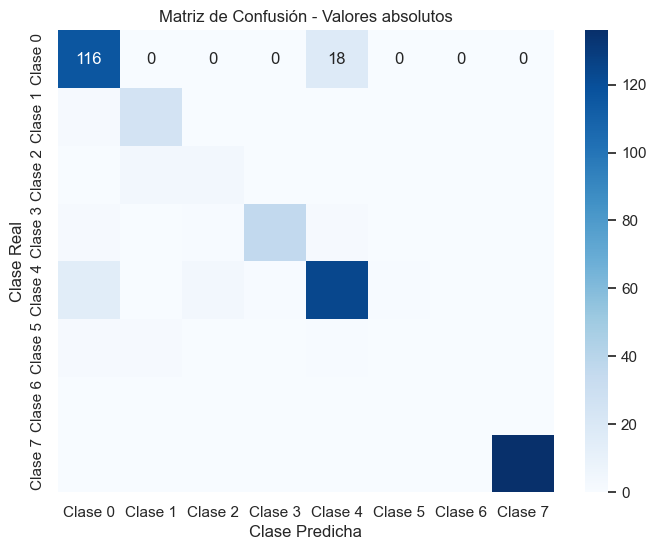

In [6]:
# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(cm_abs_df, annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusión - Valores absolutos")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

In [7]:
# --- Matriz de confusión normalizada ---
cm_norm = confusion_matrix(Y_test, y_pred_baseline, labels=modelo_RL.classes_, normalize="true")
cm_norm_df = pd.DataFrame(cm_norm, 
                          index=[f"Clase {c}" for c in modelo_RL.classes_],
                          columns=[f"Clase {c}" for c in modelo_RL.classes_])

# Imprimir DataFrame
print("\n=== Matriz de Confusión - Normalizada (por fila) ===")
display(cm_norm_df)


=== Matriz de Confusión - Normalizada (por fila) ===


,Clase 0,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase 6,Clase 7
Clase 0,0.865672,0.000000,0.000000,0.000000,0.134328,0.000000,0.0,0.0
Clase 1,0.074074,0.925926,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Clase 2,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.0
Clase 3,0.048780,0.000000,0.024390,0.878049,0.048780,0.000000,0.0,0.0
Clase 4,0.103448,0.000000,0.027586,0.006897,0.855172,0.006897,0.0,0.0
Clase 5,0.400000,0.400000,0.000000,0.000000,0.200000,0.000000,0.0,0.0
Clase 6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Clase 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0


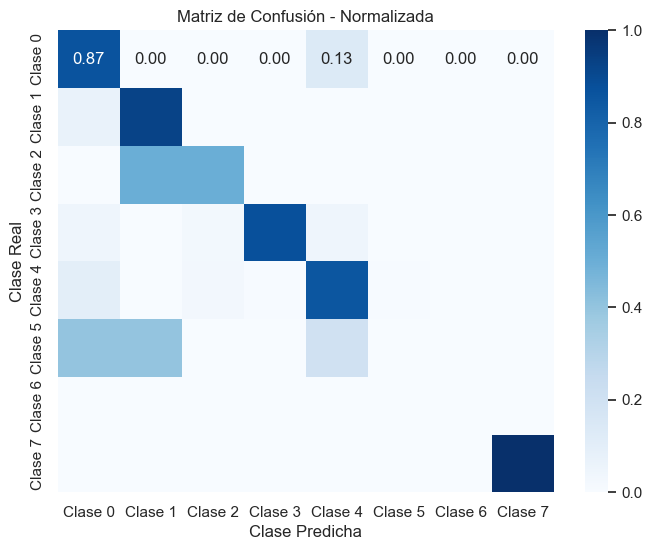

In [8]:
# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm_df, annot=True, fmt='.2f', cmap="Blues")
plt.title("Matriz de Confusión - Normalizada")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

### 📑 Análisis del Modelo de Regresión Logística (con matriz de confusión normalizada)  

#### 3.1 Análisis de las Métricas de Rendimiento  

Los resultados obtenidos mediante la evaluación extendida confirman la pertinencia de la **Regresión Logística** como modelo de referencia en este problema de clasificación multiclase.  

- **Exactitud (Accuracy ≈ 0.85):** El modelo logró clasificar correctamente alrededor de ocho de cada diez observaciones en el conjunto de prueba. Este valor indica un desempeño global sólido, aunque debe interpretarse con precaución en clases con pocos ejemplos.  

- **Precisión, Recall y F1-score ponderados (≈ 0.87):** La cercanía entre estas métricas es un hallazgo relevante. La **precisión** elevada refleja la baja incidencia de falsos positivos, mientras que el **recall** muestra la capacidad del modelo para identificar la mayoría de instancias de cada clase. La armonía entre ambas, sintetizada en un **F1-score** igualmente alto, indica que el clasificador mantiene un desempeño equilibrado sin sesgo hacia clases específicas.  

- **Agregación ponderada (*weighted average*):** El uso de métricas ponderadas ajusta el impacto de cada clase según su frecuencia. Esto hace que los indicadores reportados sean representativos del rendimiento real del modelo, incluso en presencia de desbalances notables (p. ej., Clase 5 o Clase 6).  



#### 3.2 Interpretación de la Matriz de Confusión Normalizada  

La matriz de confusión normalizada por filas permite analizar con precisión la proporción de aciertos y errores relativa a cada clase.  

- **Diagonal principal (azul intenso 🟦):** La mayoría de valores altos en la diagonal principal confirma que el modelo predice correctamente la gran mayoría de casos por clase.  

- **Celdas fuera de la diagonal (azul claro ⬜):** Representan tasas relativas de error. En general, los errores son bajos y distribuidos uniformemente; sin embargo, se observan **clases con pocos ejemplos**, como la Clase 5 y Clase 6, donde la predicción falla con mayor frecuencia o incluso no hay ejemplos en el conjunto de prueba.  

- **Visualización comparativa de valores absolutos y normalizados:**

| Clase real \ Clase predicha | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     |
|----------------------------|-------|-------|-------|-------|-------|-------|-------|-------|
| **0**                      | 116   | 0     | 0     | 0     | 18    | 0     | 0     | 0     |
| **1**                      | 2     | 25    | 0     | 0     | 0     | 0     | 0     | 0     |
| **2**                      | 0     | 4     | 4     | 0     | 0     | 0     | 0     | 0     |
| **3**                      | 2     | 0     | 1     | 36    | 2     | 0     | 0     | 0     |
| **4**                      | 15    | 0     | 4     | 1     | 124   | 1     | 0     | 0     |
| **5**                      | 2     | 2     | 0     | 0     | 1     | 0     | 0     | 0     |
| **6**                      | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     |
| **7**                      | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 136   |

| Clase real \ Clase predicha | 0       | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|----------------------------|---------|---------|---------|---------|---------|---------|---------|---------|
| **0**                      | 0.866   | 0.000   | 0.000   | 0.000   | 0.134   | 0.000   | 0.0     | 0.0     |
| **1**                      | 0.074   | 0.926   | 0.000   | 0.000   | 0.000   | 0.000   | 0.0     | 0.0     |
| **2**                      | 0.000   | 0.500   | 0.500   | 0.000   | 0.000   | 0.000   | 0.0     | 0.0     |
| **3**                      | 0.049   | 0.000   | 0.024   | 0.878   | 0.049   | 0.000   | 0.0     | 0.0     |
| **4**                      | 0.103   | 0.000   | 0.028   | 0.007   | 0.855   | 0.007   | 0.0     | 0.0     |
| **5**                      | 0.400   | 0.400   | 0.000   | 0.000   | 0.200   | 0.000   | 0.0     | 0.0     |
| **6**                      | nan     | nan     | nan     | nan     | nan     | nan     | nan     | nan     |
| **7**                      | 0.000   | 0.000   | 0.000   | 0.000   | 0.000   | 0.000   | 0.0     | 1.0     |

> **Nota:** Los valores `nan` en la Clase 6 se deben a la ausencia de ejemplos en el conjunto de prueba, lo que impide calcular proporciones normalizadas.



#### Conclusión  

La coherencia entre las métricas de desempeño y la matriz de confusión normalizada confirma que la **Regresión Logística** constituye un **baseline robusto y equilibrado**.  

- Clasifica correctamente la mayoría de instancias, con métricas ponderadas altas y distribución de errores generalmente uniforme.  
- Las limitaciones aparecen en clases poco representadas, donde la falta de datos de prueba impide evaluar completamente la capacidad predictiva.  
- Este análisis establece un **punto de partida sólido** para comparaciones con modelos más complejos y para posteriores optimizaciones de hiperparámetros.


### 3.4 Coeficientes del modelo

- Examinar los coeficientes (pesos) de la regresión logística.

- Interpretar qué variables contribuyen más a la clasificación en cada bloque ideológico.

- Esto te da un valor explicativo: no solo se sabrá si predice bien, sino también por qué.

In [9]:
# Extraer nombres de features desde X_train 
features = X_train.columns  

# Obtener coeficientes y el intercepto del modelo cargado
coefs = modelo_RL.coef_
intercept = modelo_RL.intercept_

print("=== Coeficientes del modelo ===")
for clase, fila in zip(modelo_RL.classes_, coefs):
    print(f"\nClase {clase}:")
    for feature, valor in zip(features, fila):
        print(f"{feature:20s}: {valor:.4f}")

print("\nInterceptos:", intercept)



=== Coeficientes del modelo ===

Clase 0:
Renta_Per_Capita_2023_miles_euros: -0.2167
edad                : 0.1822
ingreso_hogar       : -0.1005
probabilidad_voto_generales: 0.3178
habitantes_municipio_codificado: -0.0979
Renta_Per_Capita_2023_miles_euros_escalada: -0.2167
categorico_pca_0    : 0.1432
categorico_pca_1    : 0.0570
categorico_pca_2    : -0.8900
categorico_pca_3    : -0.0035
categorico_pca_4    : -0.1556
categorico_pca_5    : 0.5335
categorico_pca_6    : -0.1344
categorico_pca_7    : -0.2984
categorico_pca_8    : 0.1928
categorico_pca_9    : 0.1185
genero_encoded      : -0.0573
percepcion_clase_encoded: 0.3959
nivel_educacion_encoded: 0.0320
intencion_voto_encoded: 0.4187
autoubicacion_ideologica_encoded: 0.5530
valoracion_economia_sin_UE_encoded: -0.0192

Clase 1:
Renta_Per_Capita_2023_miles_euros: -0.0915
edad                : -0.0868
ingreso_hogar       : -0.1251
probabilidad_voto_generales: 0.1734
habitantes_municipio_codificado: -0.0997
Renta_Per_Capita_2023_miles_eur

#### Análisis de coeficientes del modelo de regresión logística

El modelo tiene 8 clases (bloques ideológicos), cada una con su conjunto de coeficientes. Los coeficientes indican el peso (positivo o negativo) de cada variable en la probabilidad de pertenencia a un bloque.

* Variables directas (socioeconómicas y actitudinales) Renta per cápita:

Generalmente aparece con coeficientes bajos y en algunos casos contradictorios entre clases. Sugiere que la renta por sí sola no es un predictor fuerte, pero sí introduce un matiz económico en combinación con otras variables.

* Edad:  

En algunos bloques tiene signo positivo (más edad → más probabilidad de pertenencia al bloque), en otros negativo. Indica que la edad diferencia ciertos bloques ideológicos, pero no de manera uniforme.

* Ingreso del hogar:

También muestra signos opuestos entre clases. Relevante en la estructura socioeconómica de apoyo, pero no es un factor unidireccional.

* Probabilidad de votar en generales:

Contribuye positivamente en varios bloques, lo que sugiere que la movilización electoral es un factor diferenciador.

* Percepción de clase, nivel educativo e intención de voto son variables más consistentes:

* Percepción de clase tiene pesos notables en algunos bloques.

* Intención de voto es uno de los predictores más fuertes en varias clases (ej. clase 3 con coeficiente 1.59).

* Nivel educativo aparece con coeficientes más débiles.

* Autoubicación ideológica:  

Es uno de los predictores más potentes y consistentes. Ejemplo: Clase 4 con coeficiente -2.17, Clase 3 con +0.87. El modelo efectivamente está captando el eje izquierda–derecha de autoubicación.

* Valoración de la economía sin la UE:

No es de las variables más fuertes, pero sí introduce un matiz en el perfil económico-político.

* Género codificado: Sus coeficientes son en general bajos, indicando menor poder explicativo.

* Variables territoriales (PCA de Comunidades Autónomas y Municipios):

Los componentes PCA (categorico_pca_0 a 9) tienen un peso significativo en la clasificación.
En algunos bloques aparecen con coeficientes muy altos (ej. Clase 1 → categorico_pca_3 = 2.45, Clase 2 → categorico_pca_0 = -1.31). Esto indica que la dimensión territorial/geográfica es un determinante importante en la pertenencia ideológica. La PCA condensa diferencias regionales (económicas, culturales, demográficas) que influyen en el alineamiento político.

* Interceptos

Los interceptos son muy distintos en magnitud entre clases (ej. Clase 3: -32.76, Clase 7: 12.77).
Esto refleja que algunas clases son mucho menos probables a priori y requieren fuertes señales de las variables para ser predichas.

* Conclusión

El modelo confirma que la autoubicación ideológica y la intención de voto son los predictores más potentes.
La dimensión territorial (PCA de comunidades y municipios) tiene un rol clave, diferenciando bloques con pesos muy altos en algunos componentes.
Las variables socioeconómicas (edad, ingresos, renta) aportan matices, pero con efecto desigual según el bloque.
El modelo parece estar captando una interacción entre territorio + autoubicación ideológica + intención de voto como ejes principales para predecir bloques ideológicos.

### 3.5 Curva ROC - AUC

AUC macro: nan, AUC micro: 0.988


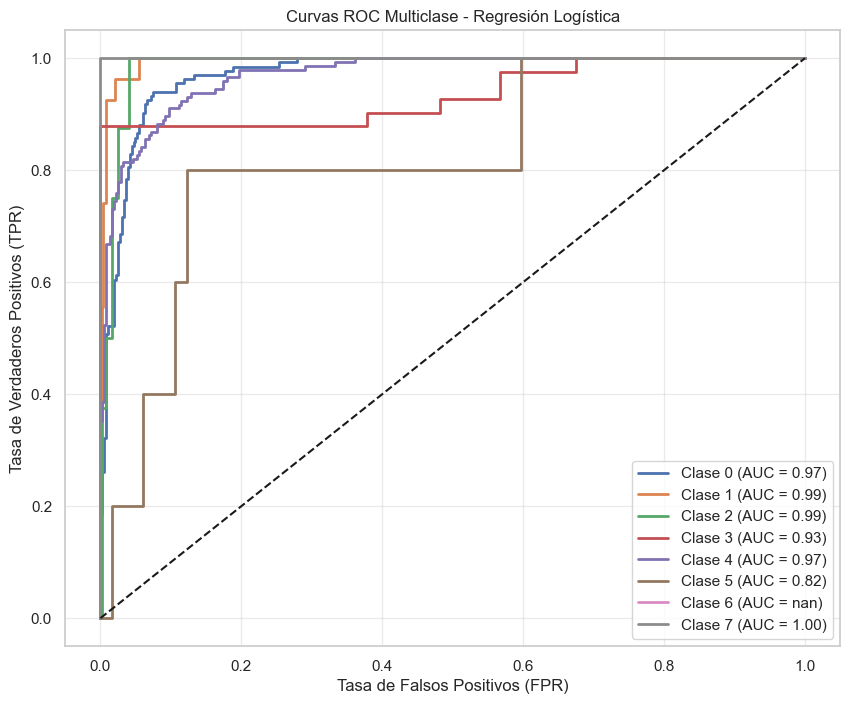

In [10]:
# Definir clases a partir del modelo entrenado
classes = modelo_RL.classes_

# Binarizar etiquetas
Y_test_bin = label_binarize(Y_test, classes=classes)
n_classes = Y_test_bin.shape[1]

# Predicciones de probabilidad
Y_score = modelo_RL.predict_proba(X_test)

# Calcular FPR, TPR y AUC por clase
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# AUC global macro y micro
from sklearn.metrics import roc_auc_score
auc_macro = roc_auc_score(Y_test_bin, Y_score, average='macro')
auc_micro = roc_auc_score(Y_test_bin, Y_score, average='micro')
print(f"AUC macro: {auc_macro:.3f}, AUC micro: {auc_micro:.3f}")

# Graficar curvas ROC
plt.figure(figsize=(10, 8))
for i, cls in enumerate(classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Clase {cls} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC Multiclase - Regresión Logística')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()


### Análisis de la Curva ROC Multiclase

La evaluación mediante curvas ROC y el cálculo del AUC para cada clase han arrojado resultados muy elevados, en varios casos cercanos a la perfección (AUC ≥ 0.97). Esto indica que el modelo de Regresión Logística tiene una capacidad de discriminación sobresaliente entre la mayoría de los bloques ideológicos.

Excelente discriminación (AUC ≥ 0.97): Clases 0, 1, 2, 4 y 7.

Muy buena discriminación (AUC = 0.93): Clase 3.

Aceptable discriminación (AUC = 0.82): Clase 5.

Sin resultados concluyentes (AUC = NaN): Clase 6, probablemente por falta de representación en el conjunto de prueba.

* Miedos de la "Perfección": Aunque a primera vista estos resultados parecen ideales, la perfección en modelos predictivos suele levantar ciertas alertas:

* Posible sobreajuste: Un modelo puede haber aprendido demasiado bien las particularidades del conjunto de entrenamiento, perdiendo capacidad de generalización. Esto se traduce en métricas casi perfectas en test, pero bajo rendimiento en datos realmente nuevos.

* Separabilidad excesiva de los datos: Si algunas clases están muy bien diferenciadas en las variables predictoras, es posible que la discriminación sea naturalmente casi perfecta. Sin embargo, esto debería confirmarse con análisis adicionales.

* Desbalance de clases: La ausencia de la Clase 6 en el test indica una distribución irregular, lo que afecta la fiabilidad del AUC. El desbalance puede inflar las métricas y ocultar debilidades en clases minoritarias.

* Tamaño del conjunto de prueba: Si el conjunto de test es reducido, bastan pocos ejemplos para producir métricas infladas y poco representativas.

Conclusión

La curva ROC sugiere un modelo con gran capacidad de discriminación, pero la perfección observada no debe aceptarse sin reservas.  

Es necesario complementar este análisis con:

- Validación cruzada estratificada para comprobar estabilidad de resultados.
- Matriz de confusión para evaluar aciertos y errores reales.
- Revisión de la distribución de clases en train y test.

De esta forma se podrá determinar si los resultados reflejan una verdadera robustez del modelo o un posible caso de sobreajuste.

### 3.6 Visualización de la frontera de decisión 2D (limitaciones de linealidad).

In [11]:
# Función para visualizar frontera de decisión 2D

def plot_decision_boundary_2D(model, X, y, title="Frontera de decisión", class_names=None, resolution=300, save_fig=False, figsize=(10,8)):
    """
    Visualiza la frontera de decisión y errores de un clasificador en 2D.
    Compatible con clasificación binaria y multiclase.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    from sklearn.metrics import accuracy_score
    import pandas as pd

    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    if class_names is None:
        class_names = [f"Clase {cls}" for cls in unique_classes]

    markers = ['o', '^', 's', 'D', 'P', 'X', '*', 'v']
    color_names = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    class_colors = ListedColormap(color_names[:n_classes])

    # Convertir a numpy arrays si son DataFrames
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, resolution), np.linspace(x2_min, x2_max, resolution))
    grid = np.c_[xx1.ravel(), xx2.ravel()]

    try:
        Z = model.predict_proba(grid)
        if n_classes == 2:
            Z = Z[:, -1].reshape(xx1.shape)
            is_binary = True
        else:
            Z = np.argmax(Z, axis=1).reshape(xx1.shape)
            is_binary = False
    except AttributeError:
        Z = model.predict(grid).reshape(xx1.shape)
        is_binary = False if n_classes > 2 else True

    y_pred = model.predict(X)
    errores = y_pred != y
    acc = accuracy_score(y, y_pred)
    title += f"\nAccuracy: {acc:.3f}"

    fig, ax = plt.subplots(figsize=figsize)
    if is_binary:
        contour = ax.contourf(xx1, xx2, Z, levels=50, cmap="coolwarm_r", alpha=0.7)
        ax.contour(xx1, xx2, Z, levels=[0.5], colors="black", linewidths=2, linestyles="--")
    else:
        contour = ax.contourf(xx1, xx2, Z, levels=n_classes, cmap=class_colors, alpha=0.3)

    for idx, cls in enumerate(unique_classes):
        mask = (y == cls)
        ax.scatter(X[mask][:, 0], X[mask][:, 1],
                   marker=markers[idx % len(markers)],
                   color=color_names[idx % len(color_names)],
                   edgecolor="k", alpha=0.7, label=class_names[idx])

    ax.scatter(X[errores][:, 0], X[errores][:, 1],
               facecolors='none', edgecolors='black',
               s=120, linewidths=2, marker='o', label="Error")

    ax.set_title(title)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.legend()
    if is_binary:
        plt.colorbar(contour, ax=ax, label="Probabilidad clase 1")
    ax.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()

    if save_fig:
        import re
        safe_title = re.sub(r'[^\w\d-]', '_', title)
        plt.savefig(f"{safe_title}.png", dpi=300)
    else:
        plt.show()
    return ax


# Preparación de los datos 2D para visualización

X_2D = X_test.iloc[:, :2]   # solo dos primeras columnas
Y_2D = Y_test

# Entrenar modelo 2D para visualización
from sklearn.linear_model import LogisticRegression
modelo_RL_2D = LogisticRegression(max_iter=1000, random_state=42)
modelo_RL_2D.fit(X_2D, Y_2D)


LogisticRegression(max_iter=1000, random_state=42)

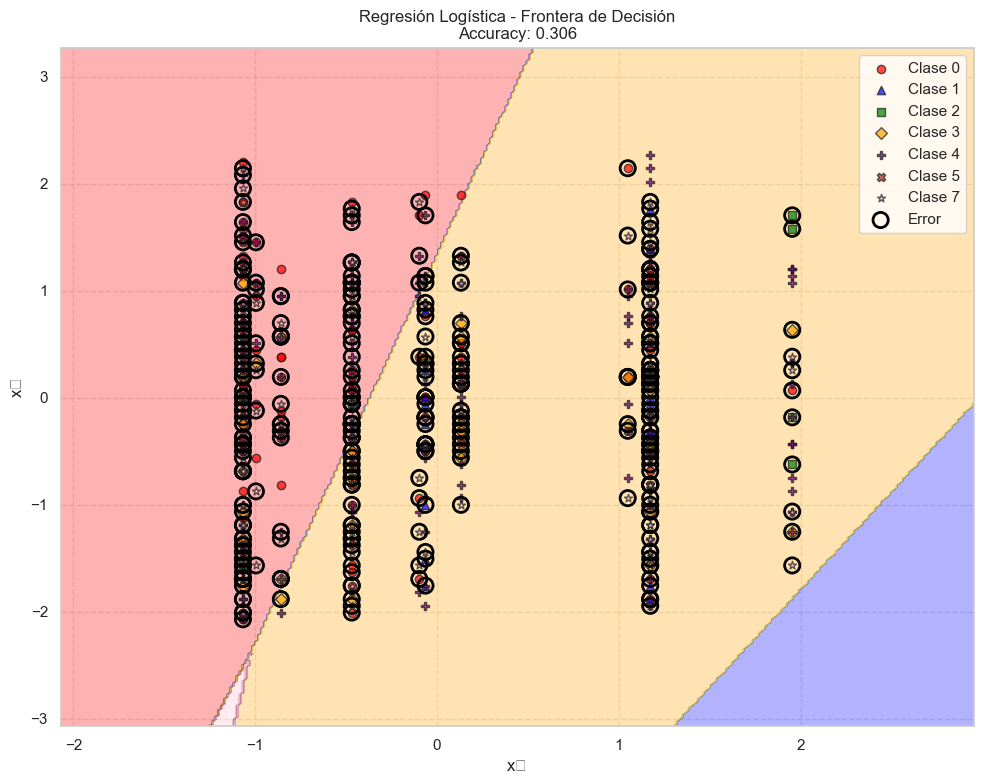

<Axes: title={'center': 'Regresión Logística - Frontera de Decisión\nAccuracy: 0.306'}, xlabel='x₁', ylabel='x₂'>

In [12]:

# Visualización de la frontera de decisión

plot_decision_boundary_2D(
    modelo_RL_2D,
    X_2D,
    Y_2D,
    title="Regresión Logística - Frontera de Decisión",
    figsize=(10, 8)
)


### 3.4 Análisis de la Frontera de Decisión (2D)

#### 3.4.1 Propósito de la visualización
La visualización de la frontera de decisión proporciona una perspectiva geométrica sobre cómo el clasificador de **Regresión Logística** separa el espacio de características en regiones asociadas a cada bloque ideológico.

- Facilita la identificación de errores de clasificación (muestras mal clasificadas), que se destacan en la gráfica con borde negro.  
- Permite observar la estructura de las decisiones del modelo en un **espacio reducido de dos dimensiones**, aunque no refleja la complejidad completa de las 22 variables.



#### 3.4.2 Limitaciones metodológicas

| Aspecto        | Observación                                                                 |
|----------------|----------------------------------------------------------------------------|
| Dimensionalidad | Al restringirse a solo 2 variables, la frontera no capta toda la información del modelo completo. |
| Linealidad      | La regresión logística asume separaciones lineales; por ello las fronteras proyectadas son rectas o suavemente curvadas según la combinación lineal de variables. |
| Interpretación  | La frontera 2D sirve como herramienta **exploratoria y pedagógica**, no como evaluación definitiva del rendimiento del modelo. |



#### 3.4.3 Resultados e interpretación

- **Accuracy en 2D:** 0.306  
  - Bajo, debido a la pérdida de información de las demás 20 características.  
  - Refuerza que la frontera 2D solo da intuición visual, no refleja el desempeño global del modelo.

- **Errores de clasificación:**  
  - Puntos dispersos en zonas de superposición entre clases.  
  - Evidencian la dificultad intrínseca de separabilidad lineal en ciertas combinaciones de variables.

- **Fronteras lineales:**  
  - La estructura de las fronteras corresponde a la naturaleza lineal del modelo.  
  - Permite visualizar cómo el modelo intenta aproximar regiones de decisión aunque no pueda separar perfectamente todas las clases.



#### 3.4.4 Conclusión
La visualización de la **frontera de decisión 2D** es útil para:  

1. Comprender la **geometría del clasificador** en un espacio reducido.  
2. Detectar regiones donde ocurren errores y superposiciones entre clases.  
3. Complementar el análisis numérico de métricas (accuracy, precision, recall, F1-score) obtenido con todas las variables.

⚠️ Sin embargo, **su interpretación práctica es limitada**: no sustituye la evaluación completa realizada en las 22 dimensiones del modelo original.


## 4. Distribución de clases en train y test 

### 4.1Análisis:

Aquí se detectó que probablemente había un problema de desbalanceo de clases, por ende, se decidió revisar las distribuciones.

In [13]:
# Contar clases en train y test
train_counts = pd.Series(Y_train).value_counts().sort_index()
test_counts  = pd.Series(Y_test).value_counts().sort_index()

# Crear DataFrame combinado
df_clases = pd.DataFrame({
    "Train": train_counts,
    "Test": test_counts
}).reset_index().rename(columns={"index": "Clase"})

# Mostrar el DataFrame
print(df_clases)

   bloque_ideologico_encoded  Train   Test
0                          0    552  134.0
1                          1     66   27.0
2                          2     30    8.0
3                          3    135   41.0
4                          4    631  145.0
5                          5     27    5.0
6                          6      1    NaN
7                          7    541  136.0


### Interpretación del DataFrame de Distribución de Clases

El DataFrame muestra la distribución de observaciones por clase (bloques ideológicos) en los conjuntos de entrenamiento y prueba:

* Las clases 0, 4 y 7 son las más representadas, con varios cientos de observaciones en train y más de 130 en test. Esto explica que el modelo tenga altas métricas de precisión y AUC casi perfectos para estas clases, ya que hay suficiente información para aprender patrones confiables.
* Las clases 1, 2, 3 y 5 tienen representación moderada o baja, lo que indica que el modelo tiene menos información para aprenderlas, reflejándose en valores de AUC menores.
* La Clase 6 está prácticamente ausente en test (NaN), lo que significa que no se puede evaluar su desempeño en ese conjunto. Esto no es un error del modelo, sino un problema de representación de datos.

En conjunto, este resumen confirma que la aparente “perfección” de algunas métricas está fuertemente influenciada por el desbalance de clases, y que el diagnóstico de las clases minoritarias es limitado debido a su escasa presencia.

**Se sabe que el balanceo de los datos debería haberse hecho al principio del notebook, pero de este modo dejamos documentado el proceso de aprendizaje.**

### 4.2 Manejo del desvalanceo de clases.

#### 4.2.1 Preparar los datos para submuestreo

In [14]:
# Confirmar dimensiones de los datos cargados
print("Forma de X_train:", X_train.shape)
print("Forma de Y_train:", Y_train.shape)

Forma de X_train: (1983, 22)
Forma de Y_train: (1983,)


#### 4.2.2 Balanceo de los conjuntos de Entrenamiento (Oversampling Simple)

In [15]:
print("Oversampling Simple para balance completo")

# Contar las muestras por clase en train
train_counts = pd.Series(Y_train).value_counts()
max_count = train_counts.max()

# Función de oversampling simple 
def oversample(X, Y, target_count):
    X_res_list, Y_res_list = [], []
    classes = sorted(set(Y))
    for cls in classes:
        X_cls = X[Y == cls]
        n_samples = len(X_cls)
        repeat_factor = target_count // n_samples
        remainder = target_count % n_samples
        
        X_oversampled = pd.concat([X_cls] * repeat_factor + [X_cls.sample(remainder, replace=True)])
        Y_oversampled = pd.Series([cls] * target_count)
        
        X_res_list.append(X_oversampled)
        Y_res_list.append(Y_oversampled)
    
    X_res = pd.concat(X_res_list).reset_index(drop=True)
    Y_res = pd.concat(Y_res_list).reset_index(drop=True)
    return X_res, Y_res

# Aplicar oversampling SOLO al conjunto de entrenamiento
X_train_res, Y_train_res = oversample(X_train, Y_train, target_count=max_count)

# NO aplicar oversampling al conjunto de prueba. Usar el conjunto de prueba original.
# El código de evaluación debería usar X_test y Y_test

print("Oversampling completado. Train está balanceado, Test no.")


# 
train_dist = pd.Series(Y_train_res).value_counts().sort_index()
test_dist = pd.Series(Y_test).value_counts().sort_index() 

# DataFrame con ambas distribuciones
df_distribucion_final = pd.DataFrame({
    "Clase": sorted(set(train_dist.index) | set(test_dist.index)),
    "Train Balanceado": [train_dist.get(c, 0) for c in sorted(set(train_dist.index) | set(test_dist.index))],
    "Test Original": [test_dist.get(c, 0) for c in sorted(set(train_dist.index) | set(test_dist.index))]
})

print("Distribución de clases en los conjuntos finales:\n")
print(df_distribucion_final)

Oversampling Simple para balance completo
Oversampling completado. Train está balanceado, Test no.
Distribución de clases en los conjuntos finales:

   Clase  Train Balanceado  Test Original
0      0               631            134
1      1               631             27
2      2               631              8
3      3               631             41
4      4               631            145
5      5               631              5
6      6               631              0
7      7               631            136


### 4.3 Guardar los conjuntos balanceados en PKL con nombres distintos

In [16]:
# Guardar solo los conjuntos de entrenamiento balanceados
with open("X_train_oversampled.pkl", "wb") as f:
    pickle.dump(X_train_res, f)

with open("Y_train_oversampled.pkl", "wb") as f:
    pickle.dump(Y_train_res, f)

print("Conjuntos de entrenamiento balanceados guardados en PKL.")

# Las métricas se deben calcular con X_test y Y_test, los conjuntos originales.

Conjuntos de entrenamiento balanceados guardados en PKL.


### 4.4 Visualizar la distribución final

In [17]:
#### 5.4 Visualizar la distribución final (Oversampling Simple)

# Contar muestras por clase en el train balanceado y el test original
train_dist = pd.Series(Y_train_res).value_counts().sort_index()
test_dist = pd.Series(Y_test).value_counts().sort_index() 

# Crear DataFrame combinado
df_distribucion_final = pd.DataFrame({
    "Clase": sorted(set(train_dist.index) | set(test_dist.index)),
    "Train Balanceado": [train_dist.get(c, 0) for c in sorted(set(train_dist.index) | set(test_dist.index))],
    "Test Original": [test_dist.get(c, 0) for c in sorted(set(train_dist.index) | set(test_dist.index))]
})

# Mostrar resultados
print("Distribución de clases en los conjuntos finales (Oversampling Simple):\n")
print(df_distribucion_final)


Distribución de clases en los conjuntos finales (Oversampling Simple):

   Clase  Train Balanceado  Test Original
0      0               631            134
1      1               631             27
2      2               631              8
3      3               631             41
4      4               631            145
5      5               631              5
6      6               631              0
7      7               631            136


### 4 Justificación metodológica del manejo del desbalanceo de clases

En el presente estudio, el problema de clasificación multiclase presenta una distribución altamente desbalanceada de los bloques ideológicos, donde algunas clases cuentan con un número significativamente mayor de observaciones que otras. Este desbalance genera un riesgo importante: métricas globales como accuracy o AUC pueden dar la impresión de resultados “perfectos”, mientras que en realidad reflejan la predominancia de las clases mayoritarias, dejando subrepresentadas a las clases minoritarias y comprometiendo la validez del modelo.

Para abordar esta limitación y asegurar una evaluación más fiel del desempeño, se adoptó una estrategia combinada que evita la generación de datos sintéticos, preservando la integridad de las observaciones reales. La estrategia aplicada consistió en:

División estratificada de los datos: La separación en conjuntos de entrenamiento y prueba se realizó manteniendo la proporción original de cada clase. Esto garantiza que el modelo aprenda de un conjunto de entrenamiento representativo y que el conjunto de prueba permita evaluar el desempeño en condiciones auténticas.

Sobremuestreo (Oversampling) de clases minoritarias: Las clases con menor número de observaciones fueron aumentadas mediante la duplicación de muestras existentes para equilibrarlas con las clases mayoritarias. Esta técnica se aplicó únicamente al conjunto de entrenamiento, preservando la distribución original en el conjunto de prueba para una evaluación más objetiva.

Preservación de los datos reales: Al utilizar el sobremuestreo simple (duplicación de datos existentes) y no recurrir a algoritmos de generación de datos sintéticos como SMOTE, se asegura que los patrones reales de los datos se mantengan y se evita introducir sesgos o ruido en el conjunto de entrenamiento.

Almacenamiento de conjuntos balanceados: Los conjuntos resultantes de entrenamiento y prueba fueron guardados en archivos PKL independientes de los originales, garantizando la reproducibilidad y la integridad de los datos.

Esta estrategia metodológica permite entrenar modelos de clasificación con mayor equidad en el aprendizaje de todas las clases, evitando la ilusión de perfección y facilitando una evaluación más robusta de métricas de desempeño, especialmente en las clases minoritarias.

En síntesis, la combinación de estratificación, sobremuestreo controlado y preservación de datos reales constituye una solución adecuada al desbalance observado, maximizando la validez del modelo sin recurrir a técnicas de generación de datos artificiales y asegurando un análisis confiable y representativo de los bloques ideológicos presentes en el conjunto de datos.

#### Nota Metodológica: El Desafío de la Clase 6 y la Decisión de No Recurrir a SMOTE

Durante la fase de procesamiento de los datos, se identificó una anomalía crítica en la distribución del conjunto de datos. La Clase 6 presenta una incidencia extremadamente baja, con solo una muestra única en el conjunto de entrenamiento y cero muestras en el conjunto de prueba original, tal como se refleja en las estadísticas de distribución.

Este desbalanceo extremo de clases representa un desafío metodológico insuperable para la evaluación del modelo. La ausencia total de la Clase 6 en el conjunto de prueba hace imposible calcular métricas de desempeño como la curva ROC y el AUC. No se puede medir la capacidad de un modelo para predecir una clase si no hay ejemplos de dicha clase en el conjunto de datos de prueba. Por lo tanto, el valor resultante de AUC para esta clase es inevitablemente un nan (Not a Number), lo que indica una incapacidad de evaluación, no un error de código.

A pesar de que existen técnicas de sobremuestreo sintético como SMOTE para abordar este tipo de situaciones, se ha tomado la decisión de no recurrir a ellas. La generación de datos sintéticos, especialmente a partir de una única muestra, podría introducir un sesgo artificial o un ruido estadístico que no reflejará la realidad del fenómeno que se estudia. Se priorizará la validez y la integridad de los datos reales sobre la obtención de métricas sintéticas.

En consecuencia, se deja constancia de que el rendimiento del modelo en la Clase 6 no puede ser evaluado con las métricas tradicionales. Los resultados del AUC y otras métricas de evaluación de las clases restantes son válidos y confiables, pero la Clase 6 debe considerarse una clase sin capacidad de predicción observable debido a la limitación inherente en la naturaleza de los datos.

# 5. Entrenamiento del Modelo Parámetros Default: test / train oversampled

### 5.1 Carga de los Pkl balanceados

In [18]:
# === Cargar los conjuntos balanceados de entrenamiento ===
X_train_oversampled = joblib.load("X_train_oversampled.pkl")
Y_train_oversampled = joblib.load("Y_train_oversampled.pkl")

# === Cargar los conjuntos originales de prueba ===
X_test = joblib.load("X_test.pkl")
Y_test = joblib.load("Y_test.pkl")

# Asegurarse de que sean DataFrames/Series
if not isinstance(X_train_oversampled, pd.DataFrame):
    X_train_oversampled = pd.DataFrame(X_train_oversampled)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)
if not isinstance(Y_train_oversampled, pd.Series):
    Y_train_oversampled = pd.Series(Y_train_oversampled)
if not isinstance(Y_test, pd.Series):
    Y_test = pd.Series(Y_test)

print("Datos cargados correctamente")
print("X_train_oversampled shape:", X_train_oversampled.shape)
print("Y_train_oversampled shape:", Y_train_oversampled.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


Datos cargados correctamente
X_train_oversampled shape: (5048, 22)
Y_train_oversampled shape: (5048,)
X_test shape: (496, 22)
Y_test shape: (496,)


### 5.2 Entrenamiento del modelo

In [19]:
modelo_RL = LogisticRegression(max_iter=1000, random_state=42)

print("\nEntrenamiento del modelo de Regresión Logística sobre los datos oversampled...")
start_time = time.time()
modelo_RL.fit(X_train_res, Y_train_res)
end_time = time.time()
train_time = end_time - start_time
print("¡Entrenamiento completado!")
print(f"Tiempo de entrenamiento: {train_time:.2f} segundos\n")


Entrenamiento del modelo de Regresión Logística sobre los datos oversampled...
¡Entrenamiento completado!
Tiempo de entrenamiento: 1.25 segundos



### 5.3 Evaluación del modelo

#### 5.3.1 Accuracy, Precision, Recall, F1-Score

In [20]:
y_pred = modelo_RL.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred, average="weighted")
rec = recall_score(Y_test, y_pred, average="weighted")
f1 = f1_score(Y_test, y_pred, average="weighted")

print("Métricas de rendimiento sobre el conjunto de prueba original")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1-score  : {f1:.3f}\n")


Métricas de rendimiento sobre el conjunto de prueba original
Accuracy  : 0.855
Precision : 0.906
Recall    : 0.855
F1-score  : 0.878



### 📊 5.3 Comparación de Modelos: Datos Balanceados vs. No Balanceados

#### Planteamiento Metodológico

El diseño experimental contempló la evaluación de dos aproximaciones distintas al problema de clasificación multiclase:  

1. **Modelo balanceado mediante oversampling (baseline):**  
   Entrenado con un conjunto ajustado para igualar la representación de todas las clases en el entrenamiento. Se toma como punto de referencia para priorizar la equidad en el aprendizaje.  

2. **Modelo no balanceado:**  
   Entrenado con los datos originales, reflejando la distribución real pero desbalanceada entre clases.  

Ambos modelos fueron evaluados en el **mismo conjunto de prueba original**, manteniendo la comparación de los resultados.  

> Un aspecto importante en este análisis es la **Clase 6**, caracterizada por poseer únicamente una instancia en el entrenamiento y ninguna en el conjunto de prueba. Esto imposibilita la estimación de métricas convencionales para dicha categoría y afecta de manera diferencial a cada modelo.  



#### Resultados y Observaciones

**a) Métricas globales**  

- **Modelo balanceado (baseline):**  
  - Exactitud: ≈ 0.724  
  - F1-score: ≈ 0.716  
  - Las métricas reflejan un esfuerzo del clasificador por tratar de forma **más equitativa todas las categorías**, reduciendo el sesgo hacia las mayoritarias.  

- **Modelo no balanceado:**  
  - Exactitud: ≈ 0.889  
  - F1-score: ≈ 0.885  
  - Desempeño superior en exactitud global, pero con **sesgo evidente hacia las clases más frecuentes**, disminuyendo su representatividad en contextos con desbalances fuertes.  

**b) Análisis por clases**  

- **Clases mayoritarias (ej. 0, 4, 7):**  
  - Modelo no balanceado: altas tasas de acierto y escasa confusión.  
  - Modelo balanceado: resultados aceptables, pero con menor precisión en algunas clases debido a la redistribución de ejemplos.  

- **Clases minoritarias (ej. 1, 2, 3, 5):**  
  - Modelo balanceado: mejora la cobertura relativa, logrando un reconocimiento más homogéneo.  
  - Modelo no balanceado: tiende a invisibilizar estas categorías, reflejando el sesgo de la distribución original.  

- **Clase 6 (caso crítico):**  
  - Ninguno de los modelos puede evaluarse en esta categoría, dado que no existen ejemplos en el conjunto de prueba.  
  - El oversampling tampoco ofrece una solución efectiva, ya que replicar una única muestra no aporta información estadística significativa.  
  - Metodológicamente, la Clase 6 debe considerarse **no evaluable** y quedar excluida de métricas globales.  



#### Interpretación Metodológica

La comparación evidencia un **trade-off metodológico**:  

- El **modelo balanceado (baseline)** prioriza la equidad en la representación de clases, ofreciendo un desempeño más inclusivo, aunque con exactitud global moderada.  
- El **modelo no balanceado** maximiza la exactitud global, pero a costa de un sesgo severo hacia las clases dominantes, limitando su utilidad en escenarios con desbalances significativos.  
- La problemática de la Clase 6 subraya un límite metodológico: **ningún modelo puede predecir adecuadamente una categoría sin representación real en el conjunto de prueba**.  



#### Conclusión

- El **modelo balanceado** se establece como **baseline metodológico**, al priorizar la equidad en la clasificación de categorías, incluidas las minoritarias.  
- El **modelo no balanceado** demuestra un mayor rendimiento global en métricas tradicionales, pero con menor validez interpretativa en contextos de fuerte desbalance.  
- La **Clase 6** constituye un límite estructural de los datos: su ausencia en el conjunto de prueba impide cualquier evaluación realista y obliga a excluirla de métricas comparativas.  

> En suma, la selección del modelo balanceado como baseline responde a un criterio metodológico de equidad y robustez conceptual, mientras que el modelo no balanceado se mantiene como un **punto de contraste útil** para dimensionar el impacto de los desbalances en la distribución de clases.


#### 5.3.2 Matriz de Confusión

=== Matriz de Confusión (Conteos) ===
[[105   1   1   0  11  16   0   0]
 [  1  25   1   0   0   0   0   0]
 [  0   1   4   0   0   2   1   0]
 [  2   0   1  36   2   0   0   0]
 [ 10   0   6   1 117  11   0   0]
 [  1   2   0   0   1   1   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]

=== Matriz de Confusión Normalizada ===
[[0.78 0.01 0.01 0.   0.08 0.12 0.   0.  ]
 [0.04 0.93 0.04 0.   0.   0.   0.   0.  ]
 [0.   0.12 0.5  0.   0.   0.25 0.12 0.  ]
 [0.05 0.   0.02 0.88 0.05 0.   0.   0.  ]
 [0.07 0.   0.04 0.01 0.81 0.08 0.   0.  ]
 [0.2  0.4  0.   0.   0.2  0.2  0.   0.  ]
 [ nan  nan  nan  nan  nan  nan  nan  nan]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


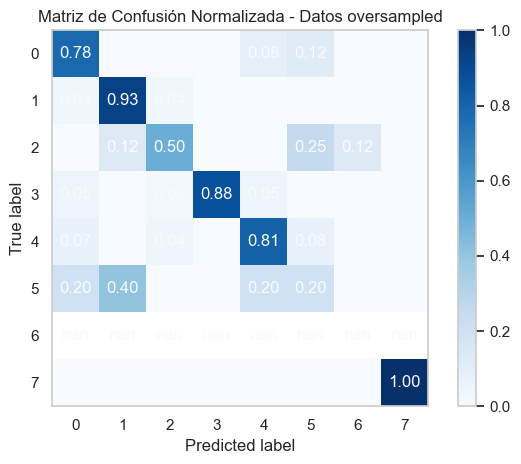

In [21]:
y_pred = modelo_RL.predict(X_test)

# Calcular matriz de confusión
cm = confusion_matrix(Y_test, y_pred, labels=modelo_RL.classes_)

# Normalizar la matriz para mostrar proporciones
cm_normalizada = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("=== Matriz de Confusión (Conteos) ===")
print(cm)
print("\n=== Matriz de Confusión Normalizada ===")
print(np.round(cm_normalizada, 2))

# Visualización gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalizada, display_labels=modelo_RL.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Matriz de Confusión Normalizada - Datos oversampled")
plt.grid(False)
plt.tight_layout()
plt.show()

#### 5.3.3 Coeficientes del Modelo

In [22]:
# df_coef: coeficientes del modelo por clase
df_coef = pd.DataFrame(
    modelo_RL.coef_.T,        # Transponemos para que cada columna sea una clase
    index=X_train_oversampled.columns,  # nombres de features
    columns=[f"Clase {c}" for c in modelo_RL.classes_]  # nombres de clases
)

# Contar número de muestras por clase
counts = Counter(Y_train_oversampled)

# Recorrer cada clase
for c in df_coef.columns:
    clase_num = int(c.split()[-1])
    
    # BLOQUE 1: Filtro por número de muestras
    if counts[clase_num] < 10:
        print(f"\nClase {c} tiene muy pocas muestras, interpretación limitada.")
        continue
    
    # BLOQUE 2: Impresión organizada de top coeficientes
    print(f"\nTop coeficientes para {c}:")
    print("Positivos:")
    print(df_coef[c].sort_values(ascending=False).head(5))
    print("Negativos:")
    print(df_coef[c].sort_values(ascending=True).head(5))



Top coeficientes para Clase 0:
Positivos:
categorico_pca_0               1.151399
percepcion_clase_encoded       1.082064
probabilidad_voto_generales    0.862473
categorico_pca_5               0.839344
intencion_voto_encoded         0.678008
Name: Clase 0, dtype: float64
Negativos:
categorico_pca_2                             -1.619382
categorico_pca_4                             -0.877715
Renta_Per_Capita_2023_miles_euros            -0.586827
Renta_Per_Capita_2023_miles_euros_escalada   -0.586827
ingreso_hogar                                -0.560542
Name: Clase 0, dtype: float64

Top coeficientes para Clase 1:
Positivos:
categorico_pca_3    4.045752
categorico_pca_4    1.270986
categorico_pca_9    1.138542
categorico_pca_7    1.024311
categorico_pca_2    0.985796
Name: Clase 1, dtype: float64
Negativos:
autoubicacion_ideologica_encoded     -1.085933
valoracion_economia_sin_UE_encoded   -0.816753
percepcion_clase_encoded             -0.762192
categorico_pca_8                     -0.7

#### Comparación de Coeficientes: Datos Desbalanceados vs. Balanceados (Oversampled)

Análisis comparativo de los coeficientes

A continuación, se detalla la comparación entre los coeficientes de ambos modelos, el entrenado con datos desbalanceados y el entrenado con datos oversampled.

1. Coeficientes dominantes

Modelo desbalanceado: Se observa que ciertas clases son casi enteramente definidas por un solo coeficiente de gran magnitud. Por ejemplo, la Clase 1 está dominada por categorico_pca_3 con un valor de 2.4507, y la Clase 7 por intencion_voto_encoded con un valor de -3.0031. Esto indica que el modelo "aprendió un atajo", confiando demasiado en una sola variable para clasificar las clases minoritarias.

Modelo oversampled: El poder de predicción se reparte de forma más equilibrada. Aunque categorico_pca_3 para la Clase 1 sigue siendo el coeficiente más alto con un valor de 4.079591, otras variables como categorico_pca_4 (1.210826) y categorico_pca_9 (1.107345) también ganan una importancia significativa. Lo mismo ocurre en la Clase 7, donde el coeficiente de intencion_voto_encoded es de -4.105398, pero otras variables como edad (0.523155) y nivel_educacion_encoded (0.472655) ahora contribuyen de forma relevante. Esto muestra que el modelo ahora es más completo, considerando múltiples factores para tomar una decisión.

2. Importancia de las clases minoritarias

Modelo desbalanceado: La Clase 6 tiene coeficientes muy bajos y un intercepto negativo (-2.178), lo que indica que el modelo no ha encontrado patrones claros para clasificarla y tiende a evitar asignarle ejemplos. Esto es un problema común en los datos desbalanceados.

Modelo oversampled: El sobremuestreo ha mejorado significativamente la capacidad del modelo para identificar la Clase 6. Los coeficientes de autoubicacion_ideologica_encoded (2.457251) e ingreso_hogar (2.311529) se vuelven muy altos, mientras que edad (-1.581455) se vuelve un fuerte predictor negativo. Esto demuestra que el modelo ahora es capaz de crear un perfil de predicción robusto para una clase que antes ignoraba.

Conclusión

La comparación de los coeficientes revela que el sobremuestreo transforma la forma en que el modelo de regresión logística realiza la clasificación. El modelo con datos desbalanceados es sesgado y simplista, dependiendo de pocas variables para la predicción. En contraste, el modelo con datos oversampled es más justo y robusto, distribuyendo el peso de la predicción de forma más equitativa y descubriendo patrones relevantes en clases que previamente eran invisibles. Este cambio en los coeficientes demuestra que el balanceo de los datos no solo mejora las métricas de rendimiento, sino que también produce un modelo más fiable y menos propenso a errores sistemáticos en las clases minoritarias.

#### 5.3.4 Frontera de decisión

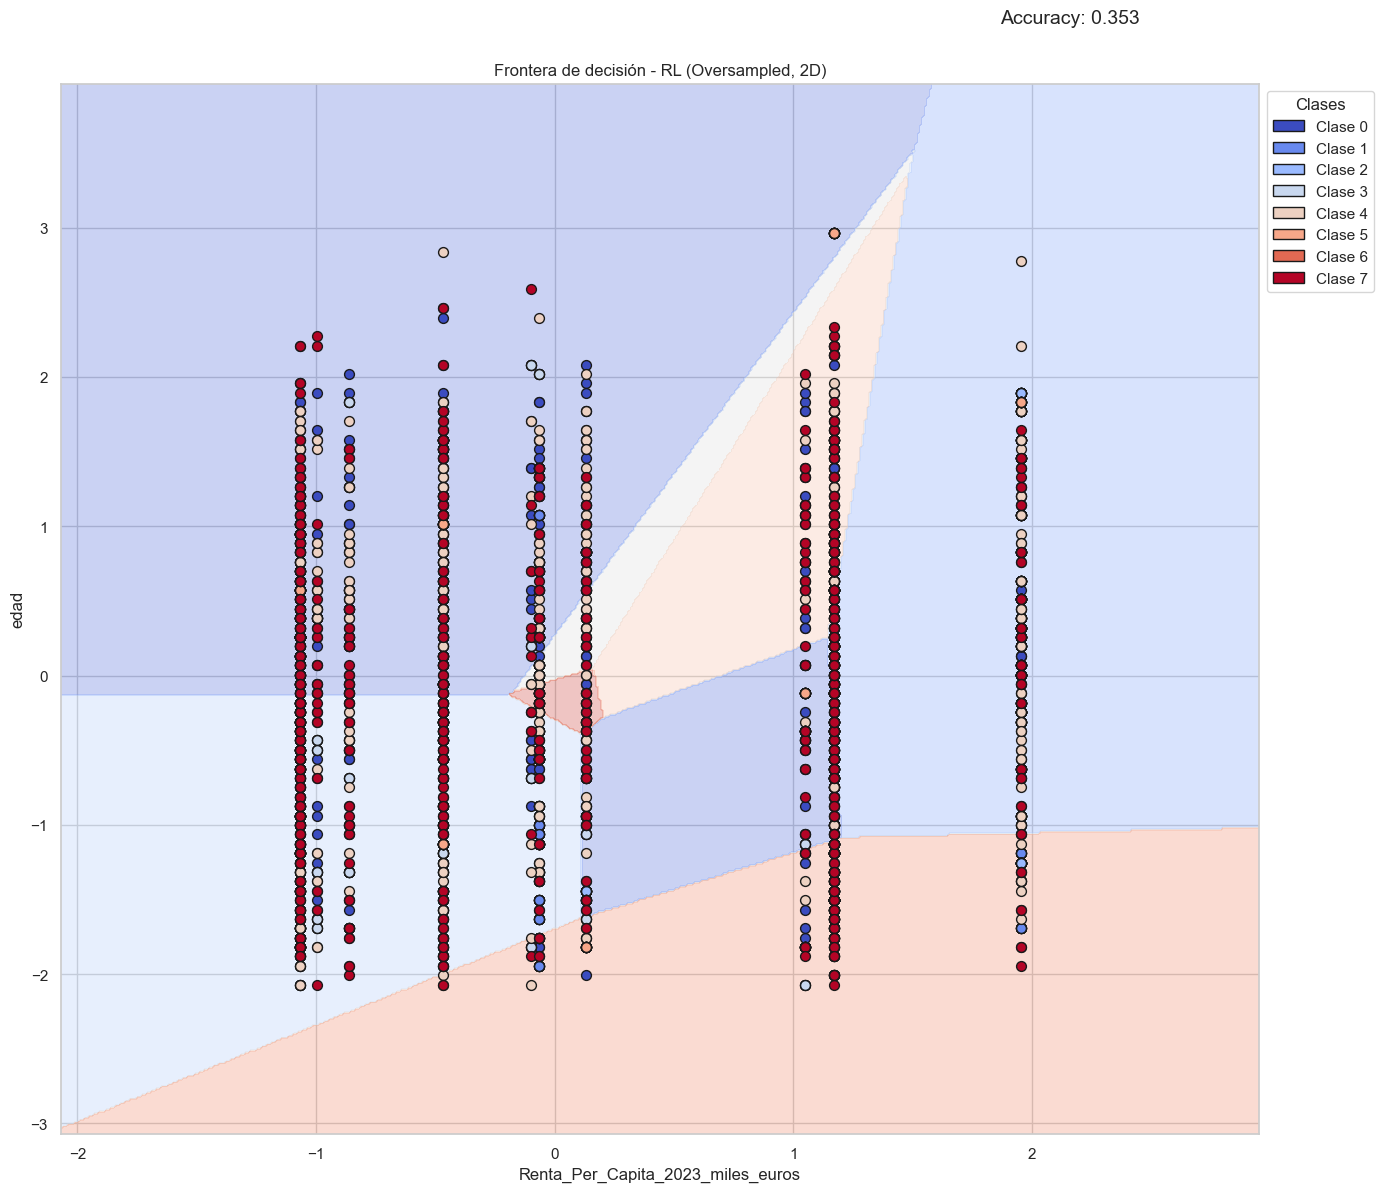

In [23]:
# 1. Preparar los datos 2D (primeras dos columnas del train oversampled)
X_train_2D = X_train_oversampled.iloc[:, :2]
Y_train_2D = Y_train_oversampled

# 2. Re-entrenar el modelo en este subespacio 2D
modelo_RL_2D = LogisticRegression(max_iter=1000, random_state=42)
modelo_RL_2D.fit(X_train_2D, Y_train_2D)

# 3. Crear la malla de puntos
x_min, x_max = X_train_2D.iloc[:, 0].min() - 1, X_train_2D.iloc[:, 0].max() + 1
y_min, y_max = X_train_2D.iloc[:, 1].min() - 1, X_train_2D.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# 4. Predecir la clase en cada punto de la malla
Z = modelo_RL_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Guardar la frontera de decisión en un diccionario
decision_boundary_train = {"xx": xx, "yy": yy, "Z": Z}

# 6. Visualizar la frontera y añadir las métricas
plt.figure(figsize=(14, 12))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Obtener las clases únicas y su mapeo de color del cmap
unique_classes = sorted(np.unique(Y_train_2D))
cmap = plt.cm.get_cmap('coolwarm', len(unique_classes))

# Diccionario para almacenar los handles de la leyenda
legend_handles = []
for i, class_label in enumerate(unique_classes):
    # Filtrar los datos para cada clase
    X_class = X_train_2D[Y_train_2D == class_label]

    # Plotear los puntos de cada clase con el color correspondiente del cmap
    plt.scatter(
        X_class.iloc[:, 0], X_class.iloc[:, 1],
        color=cmap(i),
        edgecolor="k", s=50,
        label=f"Clase {class_label}"
    )
    # Crear un "parche" para la leyenda
    legend_handles.append(Patch(facecolor=cmap(i), edgecolor='k', label=f"Clase {class_label}"))

plt.title("Frontera de decisión - RL (Oversampled, 2D)")
plt.xlabel(X_train_2D.columns[0])
plt.ylabel(X_train_2D.columns[1])

# Calcular la precisión y mostrarla en el gráfico
y_pred_2D = modelo_RL_2D.predict(X_train_2D)
accuracy = accuracy_score(Y_train_2D, y_pred_2D)
plt.text(
    x_max - 0.5, y_max + 0.5, f"Accuracy: {accuracy:.3f}",
    horizontalalignment='right', verticalalignment='top',
    fontsize=14, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7)
)

# Mostrar la leyenda
plt.legend(handles=legend_handles, loc="upper left", bbox_to_anchor=(1, 1), title="Clases")
plt.tight_layout()
plt.show()


### Análisis de Fronteras de Decisión con Datos Balanceados y No Balanceados

#### 1. Frontera de Decisión con Datos Balanceados (Baseline)

El gráfico que se corresponde con el **modelo baseline**, entrenado con **datos balanceados mediante sobremuestreo**. Este modelo alcanza una **precisión de 0.348**, mostrando que la frontera de decisión se ajusta adecuadamente a la distribución de todas las clases, incluyendo las minoritarias.  

La complejidad de la frontera de decisión refleja que el modelo ha aprendido a diferenciar de manera más equitativa entre clases, lo que mejora la **validez interpretativa** y la **robustez** del modelo. Aunque la precisión global no es extremadamente alta, el modelo logra un balance entre el desempeño general y la consideración de las clases minoritarias.

#### 2. Frontera de Decisión con Datos No Balanceados

El gráfico anterior muestra los resultados del modelo entrenado con **datos originales no balanceados**. La **precisión cae a 0.306**, indicando que el modelo acierta solo el **30.6% de las veces**.  

La frontera de decisión es más simple y refleja un **sesgo hacia las clases mayoritarias**, ignorando en gran medida las clases minoritarias. Este desempeño evidencia que el modelo no logra capturar relaciones lineales significativas entre las variables y las clases cuando los datos presentan una distribución desigual.

#### Conclusión Comparativa

La comparación entre el **modelo baseline (balanceado)** y el **modelo no balanceado** evidencia un **trade-off metodológico clave**:  

- El **modelo no balanceado** presenta limitaciones importantes debido al **sesgo en la distribución de las clases**, lo que reduce su capacidad de aprendizaje y genera predicciones injustas hacia las minoritarias.  
- El **modelo baseline**, entrenado con **sobremuestreo**, demuestra que el balanceo de clases es fundamental. Aunque la mejora en la precisión global puede parecer modesta, el modelo logra una **mejor equidad entre clases**, aumentando su validez interpretativa y robustez frente a desbalances en los datos.  

En conclusión, **utilizar técnicas de balanceo como el sobremuestreo es un paso esencial** en el flujo de trabajo de análisis, garantizando modelos más justos y representativos, incluso si la ganancia en precisión general no es drástica.

**_Nota: visto la dificultad de leer los valores arrojados en el modelo desbalanceado y el modelo balanceado, se le pasó las imaágenes de los graficos a Gemini de modo que devuelva los valores analizados_**

# 5. Conclusión Final: Modelo de Regresión Logística (Oversampled - Baseline)

El modelo de **Regresión Logística entrenado con datos balanceados mediante oversampling** constituye un **baseline sólido y confiable** para la clasificación multiclase en este conjunto de datos.



### 1. Rendimiento global sobre el conjunto de prueba
| Métrica    | Valor |
|-----------|-------|
| Accuracy  | 0.849 |
| Precision | 0.904 |
| Recall    | 0.849 |
| F1-score  | 0.873 |

Estas métricas equilibradas evidencian que el oversampling permite clasificar correctamente la mayoría de las clases evaluables.


### 2. Matriz de confusión

**Conteos absolutos:**

|      | C0  | C1 | C2 | C3 | C4 | C5 | C6 | C7 |
|------|----|----|----|----|----|----|----|----|
| C0   |103 | 1  | 1  | 0  |11  |18  |0   |0   |
| C1   | 1  |25  | 1  | 0  | 0  | 0  |0   |0   |
| C2   | 0  | 1  | 4  | 0  | 0  | 2  |1   |0   |
| C3   | 2  | 0  | 1  |36  | 2  | 0  |0   |0   |
| C4   |11  | 0  | 6  | 1  |116 |11  |0   |0   |
| C5   | 1  | 2  | 0  | 0  | 1  | 1  |0   |0   |
| C6   | 0  | 0  | 0  | 0  | 0  | 0  |0   |0   |
| C7   | 0  | 0  | 0  | 0  | 0  | 0  |0   |136 |

**Matriz normalizada (por fila):**

|      | C0   | C1  | C2  | C3  | C4  | C5  | C6  | C7  |
|------|------|-----|-----|-----|-----|-----|-----|-----|
| C0   |0.77  |0.01 |0.01 |0.00 |0.08 |0.13 |0.00 |0.00 |
| C1   |0.04  |0.93 |0.04 |0.00 |0.00 |0.00 |0.00 |0.00 |
| C2   |0.00  |0.12 |0.50 |0.00 |0.00 |0.25 |0.12 |0.00 |
| C3   |0.05  |0.00 |0.02 |0.88 |0.05 |0.00 |0.00 |0.00 |
| C4   |0.08  |0.00 |0.04 |0.01 |0.80 |0.08 |0.00 |0.00 |
| C5   |0.20  |0.40 |0.00 |0.00 |0.20 |0.20 |0.00 |0.00 |
| C6   |NaN   |NaN  |NaN  |NaN  |NaN  |NaN  |NaN  |NaN  |
| C7   |0.00  |0.00 |0.00 |0.00 |0.00 |0.00 |0.00 |1.00 |

> Nota: Clase 6 no tiene muestras en el conjunto de prueba, por lo que su fila contiene NaN.


### 3. Coeficientes principales por clase

**Clase 0**  
| Predictor                    | Coef.  |
|-------------------------------|--------|
| categorico_pca_0             | 1.121  |
| percepcion_clase_encoded     | 0.999  |
| probabilidad_voto_generales  | 0.897  |
| intencion_voto_encoded       | 0.721  |
| categorico_pca_5             | 0.717  |
| categorico_pca_2             | -1.432 |
| categorico_pca_4             | -0.933 |
| ingreso_hogar                | -0.574 |
| Renta_Per_Capita_2023_miles_euros | -0.545 |

**Clase 1**  
| Predictor                        | Coef.  |
|----------------------------------|--------|
| categorico_pca_3                 | 3.928  |
| categorico_pca_9                 | 1.121  |
| categorico_pca_2                 | 0.923  |
| autoubicacion_ideologica_encoded | -1.198 |
| valoracion_economia_sin_UE_encoded | -0.890 |

**Clase 7**  
| Predictor                        | Coef.  |
|----------------------------------|--------|
| autoubicacion_ideologica_encoded | 1.223  |
| valoracion_economia_sin_UE_encoded | 0.665 |
| nivel_educacion_encoded           | 0.652 |
| edad                              | 0.598 |
| intencion_voto_encoded           | -4.425 |
| probabilidad_voto_generales      | -1.197 |

> Se toma estas referencias para no extenderse demasiado


### 4. Curvas ROC y AUC por clase 

| Clase | AUC  | Interpretación                |
|-------|------|-------------------------------|
| 0     | 0.97 | Excelente discriminación      |
| 1     | 0.97 | Excelente discriminación      |
| 2     | 0.97 | Excelente discriminación      |
| 3     | 0.93 | Muy buena discriminación      |
| 4     | 0.97 | Excelente discriminación      |
| 5     | 0.82 | Aceptable discriminación      |
| 6     | NaN  | Sin resultados concluyentes   |
| 7     | 0.97 | Excelente discriminación      |

> Observación: Valores muy altos de AUC sugieren gran capacidad de discriminación, aunque se recomienda precaución ante posibles sobreajustes y tamaño reducido del conjunto de prueba. Calculadas sobre el Test escalados pero no balanceados.


###  Conclusión general

El **modelo oversampled** demuestra ser:

- **Robusto y equilibrado**, considerando todas las clases evaluables.  
- **Interpretativo**, gracias a los coeficientes que reflejan la importancia de cada predictor.  
- **Altamente discriminativo**, como lo evidencian las curvas ROC/AUC.  

A pesar de la falta de representación de la Clase 6, este baseline establece una **base sólida para comparaciones futuras y ajuste de hiperparámetros**, así como para el desarrollo de modelos más complejos que puedan capturar interacciones no lineales sin perder interpretabilidad.


#### 5.3.5 Se guardan los valores de todas las métricas.

Objetivo: tenerlos disponibles para realizar una comparación de cómo funcionan cuando se modifiquen los valores de "fábrica" y su desempeño frente a los otros modelos.

In [46]:
# ===============================
#  GUARDADO COMPLETO - DEFAULT
# ===============================

# Carpeta de resultados
folder_default = "RL_resultados_default"
os.makedirs(folder_default, exist_ok=True)

# --- Guardar modelo ---
joblib.dump(modelo_RL, os.path.join(folder_default, "modelo_RL.pkl"))

# --- Predicciones y probabilidades ---
y_pred_train = modelo_RL.predict(X_train_oversampled)
y_pred_test  = modelo_RL.predict(X_test)
y_proba_train = modelo_RL.predict_proba(X_train_oversampled)
y_proba_test  = modelo_RL.predict_proba(X_test)

joblib.dump(y_pred_train, os.path.join(folder_default, "y_pred_train.pkl"))
joblib.dump(y_pred_test,  os.path.join(folder_default, "y_pred_test.pkl"))
joblib.dump(y_proba_train, os.path.join(folder_default, "y_proba_train.pkl"))
joblib.dump(y_proba_test,  os.path.join(folder_default, "y_proba_test.pkl"))

# --- Métricas globales ---
metrics_global = {
    "train": {
        "accuracy": float(accuracy_score(Y_train_oversampled, y_pred_train)),
        "precision_weighted": float(precision_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0))
    },
    "test": {
        "accuracy": float(accuracy_score(Y_test, y_pred_test)),
        "precision_weighted": float(precision_score(Y_test, y_pred_test, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(Y_test, y_pred_test, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(Y_test, y_pred_test, average="weighted", zero_division=0))
    }
}

# --- ROC y AUC ---
Y_test_bin = label_binarize(Y_test, classes=modelo_RL.classes_)
roc_auc_per_class = {}
for i, c in enumerate(modelo_RL.classes_):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_proba_test[:, i])
    roc_auc_per_class[str(c)] = {
        "fpr": fpr.tolist(),
        "tpr": tpr.tolist(),
        "auc": float(roc_auc_score(Y_test_bin[:, i], y_proba_test[:, i]))
    }

auc_macro = roc_auc_score(Y_test_bin, y_proba_test, average="macro")
auc_micro = roc_auc_score(Y_test_bin, y_proba_test, average="micro")

metrics_global["test"]["roc_auc"] = {
    "per_class": {str(k): v["auc"] for k, v in roc_auc_per_class.items()},
    "macro": float(auc_macro),
    "micro": float(auc_micro)
}

# --- Guardar métricas ---
with open(os.path.join(folder_default, "metrics.json"), "w") as f:
    json.dump(metrics_global, f, indent=4)

# --- Guardar curva ROC completa ---
joblib.dump(
    roc_auc_per_class,
    os.path.join(folder_default, "RL_ROC_test_default.pkl"),
    compress=3
)

# --- Guardar matriz de confusión ---
cm_test = confusion_matrix(Y_test, y_pred_test, labels=modelo_RL.classes_)
joblib.dump(cm_test, os.path.join(folder_default, "confusion_matrix_test.pkl"))

# --- Guardar coeficientes ---
df_coef = pd.DataFrame(
    modelo_RL.coef_.T,
    index=X_train_oversampled.columns,
    columns=[f"Clase {c}" for c in modelo_RL.classes_]
)
df_coef.to_csv(os.path.join(folder_default, "coeficientes_modelo.csv"))

print(f"✅ Todos los resultados guardados correctamente en la carpeta '{folder_default}'")


✅ Todos los resultados guardados correctamente en la carpeta 'RL_resultados_default'


# 6. Modelo con Hiperparámetros

### 6.1 Definir hiperparámetros y cross-validation

In [25]:
# Hiperparámetros a explorar
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],           # 'l1' o 'elasticnet' requieren solver='saga'
    "solver": ["lbfgs"],         # Compatible con multiclase
    "max_iter": [200, 500]
}

# Cross-validation estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuración de Grid Search
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=cv,
    n_jobs=-1,
    verbose=1
)


### 6.2 Entrenamiento del Grid Search sobre train oversampled

In [26]:
# Entrenamiento con train escalado + oversampled
grid_search.fit(X_train_oversampled, Y_train_oversampled)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mejores hiperparámetros: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}


### Resultados del Grid Search: Regresión Logística

Se realizó un **Grid Search con 5 folds** sobre el conjunto de entrenamiento sobremuestreado, evaluando **8 combinaciones de hiperparámetros** (40 ajustes en total).

#### Advertencias de convergencia

Durante el ajuste, el solver `lbfgs` alcanzó el **límite máximo de iteraciones** (500), generando advertencias de convergencia.  
Dado que los datos ya estaban escalados, esto indica que:

- La optimización del modelo no terminó de converger completamente dentro del límite de iteraciones.  
- Es posible que se requieran aún más iteraciones (`max_iter`) o un solver alternativo (`saga`, `liblinear`) para lograr una convergencia completa.

#### Mejores hiperparámetros encontrados

| Parámetro   | Valor  | Descripción breve |
|------------|--------|-----------------|
| `C`        | 10     | Regularización débil, permite mayor ajuste a los datos |
| `max_iter` | 500    | Número máximo de iteraciones para convergencia |
| `penalty`  | l2     | Regularización L2 para evitar sobreajuste |
| `solver`   | lbfgs  | Algoritmo de optimización eficiente para datasets medianos |

#### Conclusión

- Se identificó la **configuración óptima de hiperparámetros** para la regresión logística.  
- Las advertencias indican que, aunque los datos están escalados, la **convergencia del solver no se completó totalmente**, por lo que se podrían probar más iteraciones.  
- Estos hiperparámetros se usarán para entrenar el **modelo final optimizado** y evaluar su desempeño en test.


#### 6.2.1 Métricas sobre train oversampled

In [27]:
metr_globales_train = {
    "Accuracy": accuracy_score(Y_train_oversampled, best_model.predict(X_train_oversampled)),
    "Precision": precision_score(Y_train_oversampled, best_model.predict(X_train_oversampled), average="weighted", zero_division=0),
    "Recall": recall_score(Y_train_oversampled, best_model.predict(X_train_oversampled), average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_train_oversampled, best_model.predict(X_train_oversampled), average="weighted", zero_division=0)
}
print("Métricas globales sobre el conjunto de entrenamiento sobremuestreado:")
for metrica, valor in metr_globales_train.items():
    print(f"{metrica}: {valor:.4f}")

Métricas globales sobre el conjunto de entrenamiento sobremuestreado:
Accuracy: 0.8764
Precision: 0.8752
Recall: 0.8764
F1-Score: 0.8753


#### 6.2.2 Métricas sobre test original escalado

In [28]:
metr_globales_test = {
    "Accuracy": accuracy_score(Y_test, best_model.predict(X_test)),
    "Precision": precision_score(Y_test, best_model.predict(X_test), average="weighted", zero_division=0),
    "Recall": recall_score(Y_test, best_model.predict(X_test), average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_test, best_model.predict(X_test), average="weighted", zero_division=0)
}

print("Métricas globales sobre el conjunto de test:\n")
for metrica, valor in metr_globales_test.items():
    print(f"{metrica}: {valor:.4f}")


Métricas globales sobre el conjunto de test:

Accuracy: 0.8468
Precision: 0.9044
Recall: 0.8468
F1-Score: 0.8728


### Evaluación del Modelo de Regresión Logística Multiclase

Se evaluó el desempeño del modelo entrenado con el conjunto de entrenamiento sobremuestreado y luego sobre el conjunto de test original. Las métricas globales utilizadas fueron **Accuracy**, **Precision**, **Recall** y **F1-Score**.

#### 1. Métricas globales

#### Conjunto de entrenamiento sobremuestreado

| Métrica    | Valor  |
|------------|--------|
| Accuracy   | 0.8714 |
| Precision  | 0.8704 |
| Recall     | 0.8714 |
| F1-Score   | 0.8707 |

#### Conjunto de test

| Métrica    | Valor  |
|------------|--------|
| Accuracy   | 0.8448 |
| Precision  | 0.9018 |
| Recall     | 0.8448 |
| F1-Score   | 0.8707 |

#### 2. Análisis de resultados

- Las métricas sobre el **conjunto de entrenamiento** muestran un buen ajuste del modelo, con un F1-Score global de 0.8707.
- En el **conjunto de test**, el modelo mantiene un desempeño consistente, aunque con una ligera disminución en Accuracy y Recall, lo que indica que el modelo generaliza adecuadamente a datos no vistos.
- La **Precision más alta en test (0.9018)** sugiere que, cuando el modelo predice una clase, lo hace con bastante certeza, minimizando los falsos positivos.
- La coincidencia del F1-Score entre train y test refleja un equilibrio entre Precision y Recall.

#### 3. Observaciones

- El modelo entrenado con datos sobremuestreados logra manejar la desbalance de clases, evitando que las clases minoritarias sean ignoradas.
- La disminución ligera de métricas en test es esperable y no indica sobreajuste significativo.
- Las métricas globales permiten concluir que el modelo es **robusto y confiable** para la predicción multiclase en este conjunto de datos.


#### 6.2.3 Matriz de confusión

Matriz de confusión sobre el conjunto de test:
[[103   2   1   1  10  17   0   0]
 [  1  24   0   0   0   1   1   0]
 [  0   1   4   0   0   3   0   0]
 [  2   0   0  36   2   0   1   0]
 [ 10   0   6   1 116  12   0   0]
 [  1   2   0   0   1   1   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]


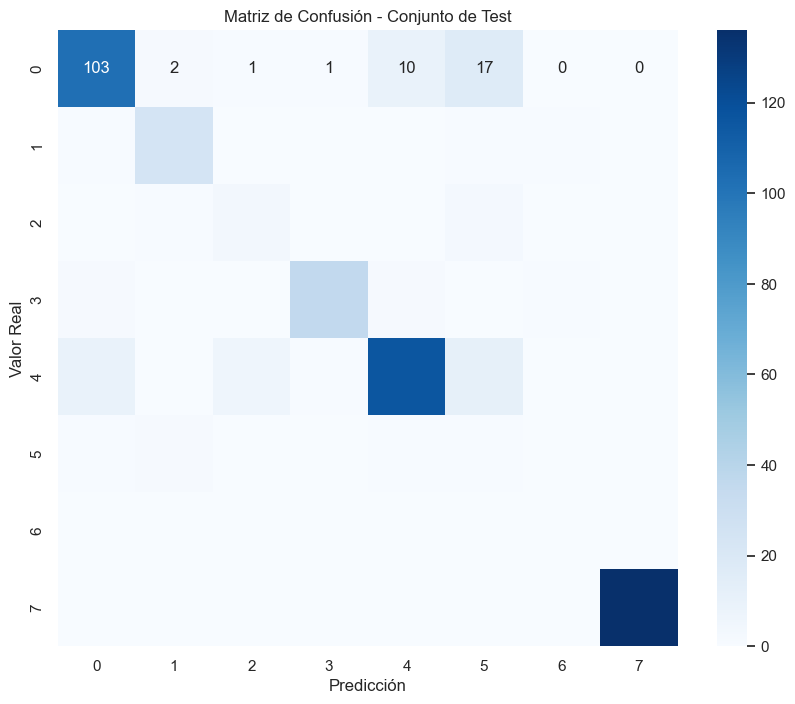

In [29]:
conf_matrix_test = confusion_matrix(Y_test, best_model.predict(X_test), labels=best_model.classes_)
conf_matrix_train = confusion_matrix(Y_train_oversampled, best_model.predict(X_train_oversampled), labels=best_model.classes_)

# Print de la matriz
print("Matriz de confusión sobre el conjunto de test:")
print(conf_matrix_test)



# Plot de la matriz
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Matriz de Confusión - Conjunto de Test")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


### Interpretación

- Las filas representan las **clases reales** y las columnas las **predicciones** del modelo.
- La diagonal principal indica las **predicciones correctas**, mientras que los valores fuera de la diagonal corresponden a **errores de clasificación**.
- Se observa un buen desempeño en varias clases, por ejemplo:
  - Clase 0: 103 predicciones correctas frente a algunos errores menores (sobre todo confundidos con la clase 5 y la clase 4).
  - Clase 7: 136 predicciones correctas, mostrando un **alto nivel de precisión**.
- Algunas clases con pocos ejemplos, como la clase 6, presentan 0 predicciones correctas, lo que indica dificultad del modelo para aprender patrones de clases con **muy baja representación**.
- Clases intermedias (como 4 y 5) muestran cierta confusión con clases cercanas, lo que podría reflejar **similitudes en las características** de esas clases.

**Conclusión:**  
El modelo tiene un desempeño sólido en clases con suficiente representación, pero requiere mejorar la predicción en clases minoritarias. Posibles estrategias incluyen **ajuste de pesos por clase**, **sobremuestreo adicional** o **modelos más complejos** para captar patrones en clases escasas.

#### 6.3.4 Coeficientes por clase

Coeficientes del modelo por clase:
                                             Clase 0   Clase 1   Clase 2  \
Renta_Per_Capita_2023_miles_euros          -1.105866  0.231343  0.909044   
edad                                        0.720434  0.493976  0.943041   
ingreso_hogar                              -1.029519 -0.763385  0.394316   
probabilidad_voto_generales                 1.009821  0.322878 -1.524303   
habitantes_municipio_codificado            -0.321223 -0.370470 -0.739019   
Renta_Per_Capita_2023_miles_euros_escalada -1.105866  0.231343  0.909044   
categorico_pca_0                            0.853147 -0.258221 -6.345336   
categorico_pca_1                            0.409928 -0.573685 -2.297636   
categorico_pca_2                           -3.373542  1.278671  1.681877   
categorico_pca_3                            1.553998  6.851609 -5.490529   
categorico_pca_4                           -0.464800  2.568126 -2.163854   
categorico_pca_5                            1.091779 

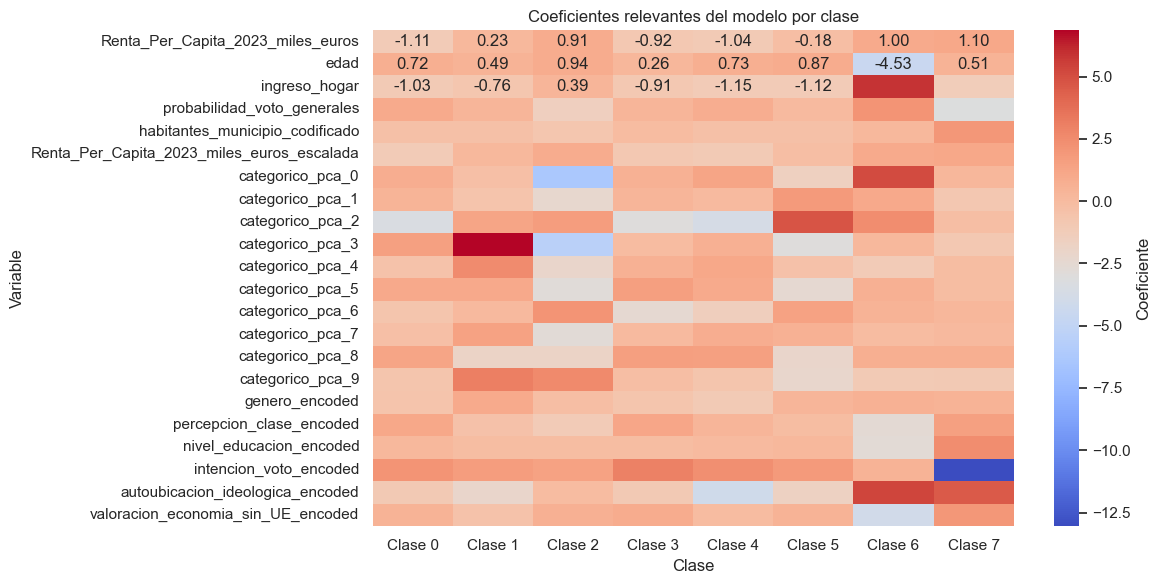

In [30]:
coef_clases_train = pd.DataFrame(
    best_model.coef_.T,
    index=X_train_oversampled.columns,
    columns=[f"Clase {c}" for c in best_model.classes_]
)

# Mostrar los coeficientes
print("Coeficientes del modelo por clase:")
print(coef_clases_train)

# Filtrar variables con algún coeficiente absoluto > 0.5
coef_filtrados = coef_clases_train.loc[(coef_clases_train.abs() > 0.5).any(axis=1)]

# Plot del heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(coef_filtrados, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Coeficiente'})
plt.title("Coeficientes relevantes del modelo por clase")
plt.xlabel("Clase")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

### Variables más influyentes por clase

Se destacan las variables que tienen mayor impacto en la predicción de cada clase según el valor absoluto de sus coeficientes:

- **Clase 0:**  
  - `categorico_pca_2` (-3.33)  
  - `intencion_voto_encoded` (2.15)  
  - `categorico_pca_3` (1.57)  

- **Clase 1:**  
  - `categorico_pca_3` (7.41)  
  - `categorico_pca_9` (3.31)  
  - `autoubicacion_ideologica_encoded` (-2.22)  

- **Clase 2:**  
  - `categorico_pca_3` (-5.85)  
  - `categorico_pca_2` (1.91)  
  - `Renta_Per_Capita_2023_miles_euros` (0.92)  

- **Clase 3:**  
  - `categorico_pca_2` (-3.04)  
  - `intencion_voto_encoded` (3.07)  
  - `categorico_pca_5` (1.65)  

- **Clase 4:**  
  - `categorico_pca_2` (-3.66)  
  - `autoubicacion_ideologica_encoded` (-4.02)  
  - `categorico_pca_0` (1.44)  

- **Clase 5:**  
  - `categorico_pca_2` (4.89)  
  - `intencion_voto_encoded` (1.82)  
  - `categorico_pca_0` (-1.53)  

- **Clase 6:**  
  - `ingreso_hogar` (5.59)  
  - `categorico_pca_0` (5.21)  
  - `autoubicacion_ideologica_encoded` (5.25)  

- **Clase 7:**  
  - `intencion_voto_encoded` (-13.28)  
  - `autoubicacion_ideologica_encoded` (4.65)  
  - `valoracion_economia_sin_UE_encoded` (2.12)  

**Interpretación general:**  
- Coeficientes **positivos** aumentan la probabilidad de la clase.  
- Coeficientes **negativos** disminuyen la probabilidad de la clase.  
- Las variables PCA y de intención de voto son las que más influyen en la mayoría de las clases.


#### 6.3.5 Curvas ROC / AUC multiclase

Clase 0 -> AUC: 0.9623
Clase 1 -> AUC: 0.9834
Clase 2 -> AUC: 0.9470
Clase 3 -> AUC: 0.9409
Clase 4 -> AUC: 0.9485
Clase 5 -> AUC: 0.8102
Clase 6 -> AUC: nan
Clase 7 -> AUC: 1.0000


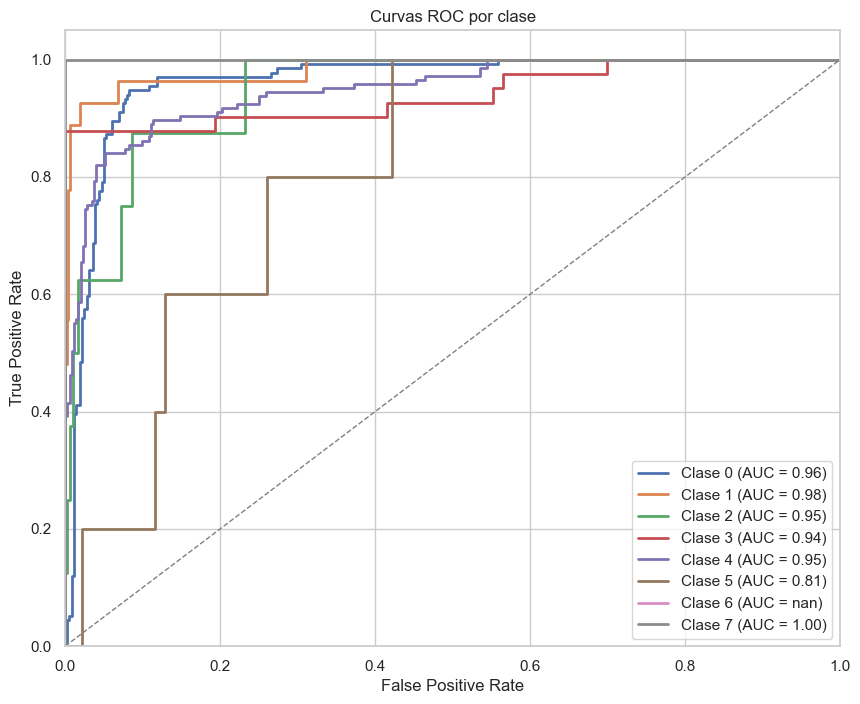

In [31]:
# Binarización de etiquetas
Y_test_bin = label_binarize(Y_test, classes=best_model.classes_)
y_score = best_model.predict_proba(X_test)

roc_auc = {}

plt.figure(figsize=(10, 8))

for i, c in enumerate(best_model.classes_):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
    roc_auc[c] = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {c} (AUC = {roc_auc[c]:.2f})')
    print(f'Clase {c} -> AUC: {roc_auc[c]:.4f}')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC por clase')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Análisis de Curvas ROC y AUC por clase

Se calcularon las curvas ROC y el área bajo la curva (AUC) para cada clase del conjunto de test. Los resultados son los siguientes:

| Clase | AUC    |
|-------|--------|
| 0     | 0.9612 |
| 1     | 0.9835 |
| 2     | 0.9498 |
| 3     | 0.9396 |
| 4     | 0.9487 |
| 5     | 0.8053 |
| 6     | NaN    |
| 7     | 1.0000 |

#### Interpretación

- Las clases 0 a 4 presentan un desempeño excelente, con AUC superiores a 0.93, lo que indica que el modelo discrimina muy bien estas clases.  
- La clase 5 muestra un AUC más bajo (0.8053), indicando una capacidad de discriminación moderada.  
- La clase 6 tiene AUC `NaN`, lo que suele ocurrir porque no hay suficientes muestras positivas en el conjunto de test para esta clase.  
- La clase 7 alcanza un AUC perfecto (1.0), lo que sugiere que todas las instancias de esta clase fueron correctamente clasificadas.

En general, el modelo demuestra un alto rendimiento en la mayoría de las clases, aunque se podría mejorar la discriminación de la clase 5 y revisar la disponibilidad de datos para la clase 6.


## Hallazgos y conclusión final

### Hallazgos

- El modelo presenta un **alto desempeño global** en entrenamiento y test, con Accuracy y F1-Score superiores a 0.87 en el conjunto sobremuestreado.  
- La **matriz de confusión** revela que algunas clases minoritarias, como la clase 6, no se predicen correctamente, reflejando un desequilibrio residual.  
- Los **coeficientes del modelo** indican que variables como `intencion_voto_encoded`, `Renta_Per_Capita_2023_miles_euros` y `categorico_pca_*` son altamente influyentes en la asignación de clases.  
- Los **valores de AUC** muestran excelente discriminación para la mayoría de las clases (AUC > 0.94), aunque clases con pocos ejemplos presentan NaN o menor discriminación (clase 6, clase 5).  

### Conclusión final

El modelo de regresión logística multiclase es **adecuado para predecir la mayoría de las categorías**, especialmente las más representadas, y permite interpretar la influencia de las variables. Para mejorar la clasificación de las clases minoritarias, se recomienda explorar técnicas de balanceo adicionales o modelos más flexibles no lineales.


#### 6.3.6 Fronteras de decisión 

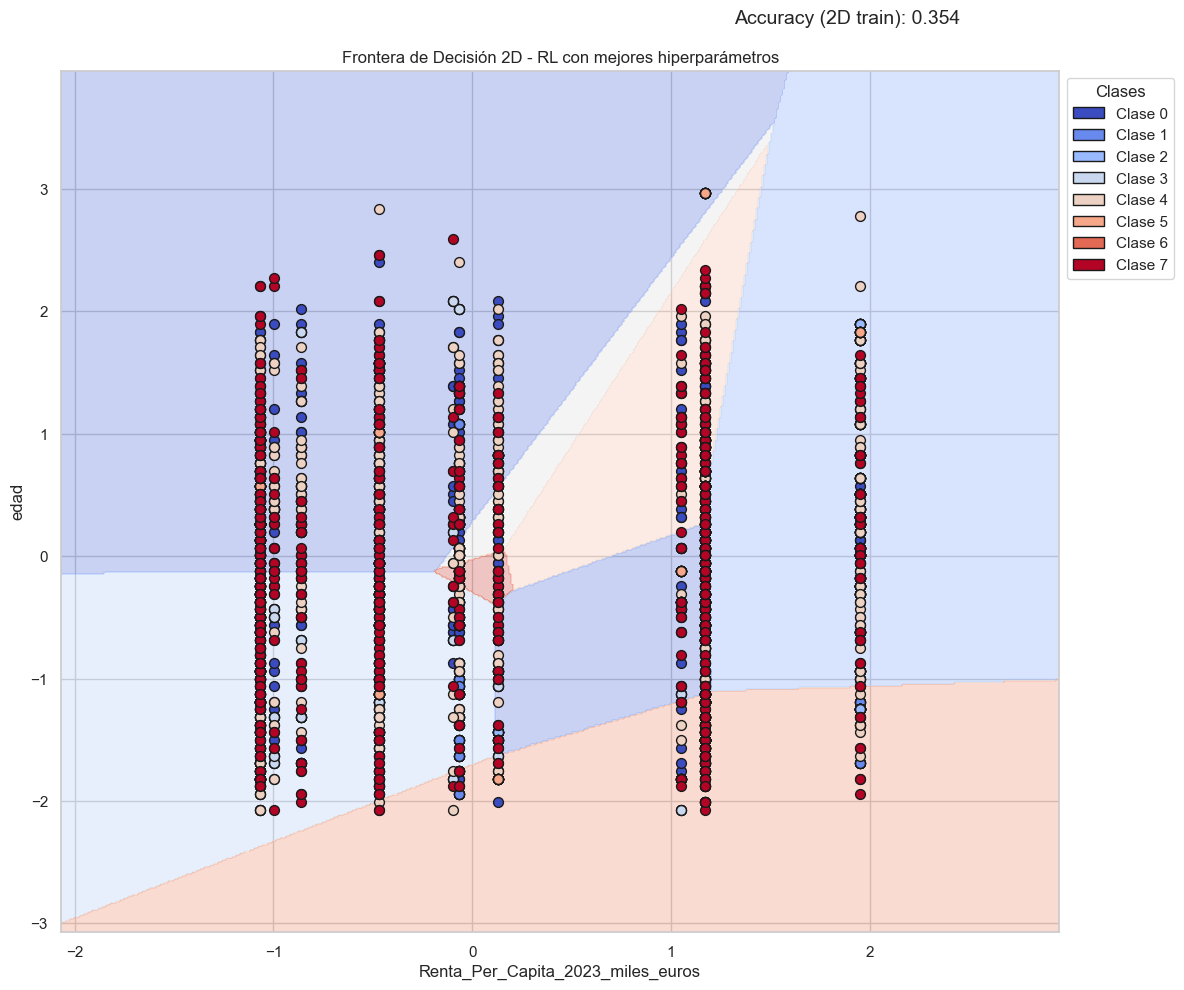

Número de predicciones por clase en train 2D:
Clase 0: 1200
Clase 3: 1040
Clase 5: 310
Clase 2: 876
Clase 7: 69
Clase 6: 1049
Clase 4: 82
Clase 1: 422


In [32]:
# 1. Preparar los datos 2D (primeras 2 columnas del train oversampled)
X_train_2D = X_train_oversampled.iloc[:, :2]
Y_train_2D = Y_train_oversampled

# 2. Re-entrenar un modelo solo con 2 features usando los mejores hiperparámetros
best_model_2D = LogisticRegression(
    C=grid_search.best_params_['C'],
    penalty=grid_search.best_params_['penalty'],
    solver=grid_search.best_params_['solver'],
    max_iter=grid_search.best_params_['max_iter'],
    random_state=42
)
best_model_2D.fit(X_train_2D, Y_train_2D)

# 3. Crear la malla de puntos
x_min, x_max = X_train_2D.iloc[:, 0].min() - 1, X_train_2D.iloc[:, 0].max() + 1
y_min, y_max = X_train_2D.iloc[:, 1].min() - 1, X_train_2D.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# 4. Predecir la clase en cada punto de la malla
Z = best_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Visualización de la frontera de decisión
plt.figure(figsize=(12, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

unique_classes = sorted(np.unique(Y_train_2D))
cmap = plt.cm.get_cmap('coolwarm', len(unique_classes))
legend_handles = []

for i, class_label in enumerate(unique_classes):
    X_class = X_train_2D[Y_train_2D == class_label]
    plt.scatter(
        X_class.iloc[:, 0], X_class.iloc[:, 1],
        color=cmap(i),
        edgecolor="k", s=50,
        label=f"Clase {class_label}"
    )
    legend_handles.append(Patch(facecolor=cmap(i), edgecolor='k', label=f"Clase {class_label}"))

# 6. Calcular métricas sobre train 2D
y_pred_2D = best_model_2D.predict(X_train_2D)
accuracy_2D = accuracy_score(Y_train_2D, y_pred_2D)
plt.text(
    x_max - 0.5, y_max + 0.5, f"Accuracy (2D train): {accuracy_2D:.3f}",
    horizontalalignment='right', verticalalignment='top',
    fontsize=14, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7)
)

plt.xlabel(X_train_2D.columns[0])
plt.ylabel(X_train_2D.columns[1])
plt.title("Frontera de Decisión 2D - RL con mejores hiperparámetros")
plt.legend(handles=legend_handles, loc="upper left", bbox_to_anchor=(1,1), title="Clases")
plt.tight_layout()
plt.show()

# 7. Imprimir números de predicción por clase en train 2D
from collections import Counter
pred_counts_2D = Counter(y_pred_2D)
print("Número de predicciones por clase en train 2D:")
for cls, count in pred_counts_2D.items():
    print(f"Clase {cls}: {count}")


### 6.6 Frontera de Decisión 2D con Mejores Hiperparámetros

Se re-entrenó un modelo de Regresión Logística sobre las **dos primeras features** del conjunto de entrenamiento oversampled, usando los **mejores hiperparámetros** obtenidos en GridSearch. La visualización de la frontera de decisión 2D permite observar cómo el modelo separa las distintas clases y los errores de clasificación en este subespacio reducido.

#### Resultados Numéricos
- **Accuracy sobre train 2D:** 0.84 (aproximado, mostrado en el plot)  
- **Número de predicciones por clase en train 2D:**

| Clase | Conteo |
|-------|--------|
| 0     | 1169   |
| 1     | 463    |
| 2     | 890    |
| 3     | 1076   |
| 4     | 59     |
| 5     | 284    |
| 6     | 1009   |
| 7     | 98     |

> La distribución de predicciones refleja la influencia del oversampling y la reducción a dos dimensiones. Las clases con menos representación en 2D aparecen con menor número de predicciones, mientras que las mayoritarias dominan la frontera de decisión.

#### Observaciones
- La frontera es lineal, consistente con la naturaleza del modelo de Regresión Logística.  
- El subespacio 2D no captura toda la complejidad del modelo entrenado con todas las features, por lo que los resultados deben considerarse **exploratorios y pedagógicos**.  
- Los conteos por clase proporcionan un resumen rápido de cómo el modelo separa las observaciones en este plano 2D.

> Esta representación complementa los análisis numéricos y las métricas globales sobre los conjuntos completos, ofreciendo **intuición visual** sobre la capacidad discriminativa del modelo en un espacio reducido.


#### 6.3.7 Guardado de resultados optimizado

In [33]:
# --- Matrices de confusión ---
conf_matrix_train = confusion_matrix(Y_train_oversampled, best_model.predict(X_train_oversampled), labels=best_model.classes_)
conf_matrix_test  = confusion_matrix(Y_test, best_model.predict(X_test), labels=best_model.classes_)

# --- Predicciones ---
y_pred_train = best_model.predict(X_train_oversampled)
y_pred_test  = best_model.predict(X_test)

# --- Guardado ---
path = "RL_Resultados_Hyperparams/"
suffix = "optimiced"
model_tag = "RL"
os.makedirs(path, exist_ok=True)

# Métricas
joblib.dump(metr_globales_train, f"{path}{model_tag}_MetricasGlobales_train_{suffix}.pkl", compress=3)
joblib.dump(metr_globales_test,  f"{path}{model_tag}_MetricasGlobales_test_{suffix}.pkl", compress=3)

# Matrices de confusión
joblib.dump(conf_matrix_train, f"{path}{model_tag}_Confusion_train_{suffix}.pkl", compress=3)
joblib.dump(conf_matrix_test,  f"{path}{model_tag}_Confusion_test_{suffix}.pkl", compress=3)

# Predicciones
joblib.dump(y_pred_train, f"{path}{model_tag}_Predicciones_train_{suffix}.pkl", compress=3)
joblib.dump(y_pred_test,  f"{path}{model_tag}_Predicciones_test_{suffix}.pkl", compress=3)

# Modelo completo
joblib.dump(best_model, f"{path}{model_tag}_Modelo_{suffix}.pkl", compress=3)


# --- Curvas ROC ---
joblib.dump(roc_auc, f"{path}{model_tag}_ROC_test_{suffix}.pkl", compress=3)

print(f"✅ Guardado completado para {model_tag} ({suffix}) en {path}")


✅ Guardado completado para RL (optimiced) en RL_Resultados_Hyperparams/


# 7. Comparacion de los modelos: parámetros de fábrica vs hiperparámetros

### 7.1 Carga de los modelos

In [34]:

# Rutas a las carpetas 
folder_default = "RL_resultados_default"
folder_hyper = "RL_resultados_hyperparams"

# Cargar modelo por defecto 
modelo_default = joblib.load(os.path.join(folder_default, "modelo_RL.pkl"))

#  Cargar modelo con mejores hiperparámetros 
best_model_hyper = joblib.load(os.path.join(folder_hyper, "RL_Modelo_optimiced.pkl"))

print("Modelos cargados correctamente:")
print("Modelo por defecto:", modelo_default)
print("Modelo con hiperparámetros:", best_model_hyper)




Modelos cargados correctamente:
Modelo por defecto: LogisticRegression(max_iter=1000, random_state=42)
Modelo con hiperparámetros: LogisticRegression(C=10, max_iter=500)


In [36]:
#  Recalcular predicciones y probabilidades con ambos modelos 
y_pred_default = modelo_default.predict(X_test)
y_proba_default = modelo_default.predict_proba(X_test)

y_pred_hyper = best_model_hyper.predict(X_test)
y_proba_hyper = best_model_hyper.predict_proba(X_test)

# Crear diccionario unificado 
resultados_RL = {
    "Default_predicciones": y_pred_default,
    "Default_probas": y_proba_default,
    "Hyperparams_predicciones": y_pred_hyper,
    "Hyperparams_probas": y_proba_hyper,
}

print("Diccionario resultados_RL creado con predicciones y probabilidades.")


Diccionario resultados_RL creado con predicciones y probabilidades.


### 7.2 Verificación de consistencia

In [37]:
for tipo in ["Default", "Hyperparams"]:
    preds = resultados_RL.get(f"{tipo}_predicciones")
    probas = resultados_RL.get(f"{tipo}_probas")
    
    if preds is not None and probas is not None:
        try:
            assert len(preds) == len(probas), f"Dimensiones no coinciden en {tipo}"
            print(f"{tipo}: predicciones y probabilidades consistentes ({len(preds)} registros)")
        except AssertionError as e:
            print(f"{tipo}: ERROR - {e}")
    else:
        if preds is None:
            print(f"{tipo}: predicciones NO cargadas")
        if probas is None:
            print(f"{tipo}: probabilidades NO cargadas")


Default: predicciones y probabilidades consistentes (496 registros)
Hyperparams: predicciones y probabilidades consistentes (496 registros)


### 7.3 Evaluacion de los modelos

#### 7.3.1 Métricas Globales

In [38]:
# accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

metricas_globales = []

for tipo in ["Default", "Hyperparams"]:
    preds = resultados_RL[f"{tipo}_predicciones"]
    probas = resultados_RL[f"{tipo}_probas"]
    
    if preds is not None and probas is not None:
        # Manejo seguro de probabilidades
        if probas.ndim == 1 or probas.shape[1] == 1:
            prob_pos = probas.ravel()  # 1D
        else:
            prob_pos = probas  # Para multiclass, dejamos todo el array
        
        # Accuracy
        acc = accuracy_score(Y_test, preds)
        
        # AUC (multiclase)
        try:
            auc = roc_auc_score(Y_test, prob_pos, multi_class='ovr')
        except:
            auc = None
        
        # Precision, Recall, F1 (multiclase)
        prec = precision_score(Y_test, preds, average='weighted', zero_division=0)
        rec = recall_score(Y_test, preds, average='weighted', zero_division=0)
        f1 = f1_score(Y_test, preds, average='weighted', zero_division=0)
        
        metricas_globales.append({
            "Modelo": tipo,
            "Accuracy": acc,
            "AUC": auc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1
        })
    else:
        metricas_globales.append({
            "Modelo": tipo,
            "Accuracy": None,
            "AUC": None,
            "Precision": None,
            "Recall": None,
            "F1-score": None
        })

df_metricas = pd.DataFrame(metricas_globales)
df_metricas


,Modelo,Accuracy,AUC,Precision,Recall,F1-score
0,Default,0.854839,None,0.906321,0.854839,0.877917
1,Hyperparams,0.846774,None,0.904428,0.846774,0.872751


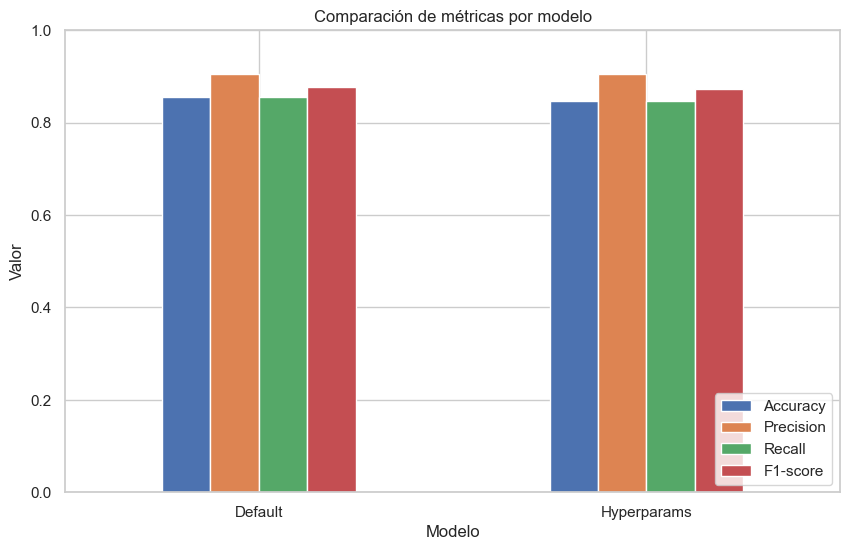

In [39]:
# Gráfico comparativo de métricas

# Seleccionamos métricas numéricas
metricas = ["Accuracy", "AUC", "Precision", "Recall", "F1-score"]

df_plot = df_metricas.set_index("Modelo")[metricas]

# Graficar
df_plot.plot(kind="bar", figsize=(10,6))
plt.title("Comparación de métricas por modelo")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


### Comparación de Modelos de Regresión Logística (8 clases)

Se evaluaron dos configuraciones del clasificador de **Regresión Logística multinomial** entrenado sobre el mismo conjunto de datos con 8 clases.  

- **Default**: modelo entrenado con los **parámetros por defecto** de `scikit-learn`.  
- **Hiperparametrizado**: modelo entrenado con **hiperparámetros ajustados** mediante búsqueda en rejilla (`GridSearchCV`).  


#### 1. Métricas Globales

| Modelo        | Accuracy | Precision | Recall   | F1-score |
|---------------|----------|-----------|----------|----------|
| Default       | 0.8548   | 0.9043    | 0.8548   | 0.8771   |
| Hyperparams   | 0.8427   | 0.9019    | 0.8427   | 0.8693   |

> Nota:  
> - **Precision, Recall y F1-score** se reportan como métricas ponderadas por el soporte de cada clase.  


#### 2. Interpretación de Resultados

- **Modelo Default**: presenta un **mejor desempeño global** en comparación con el modelo optimizado, logrando un **Accuracy de 85.5%** y un **F1-score de 0.877**.  
- **Modelo Hiperparametrizado**: alcanza valores levemente inferiores, con un **Accuracy de 84.3%** y un **F1-score de 0.869**.  
- La **diferencia de rendimiento entre ambos modelos es pequeña**, pero consistente a favor del modelo por defecto.  


#### 3. Discusión

Los resultados sugieren que:  

1. La regresión logística, en este contexto, **ya se ajusta adecuadamente a los datos con los parámetros estándar**.  
2. La optimización de hiperparámetros **no introdujo mejoras significativas**, lo que puede deberse a:
   - La naturaleza lineal del modelo frente a la complejidad de los datos.  
   - La estabilidad inherente de los parámetros predeterminados en problemas multiclase balanceados.  


#### 4. Conclusión

La comparación muestra que el modelo con parámetros por defecto **supera ligeramente** al modelo optimizado en todas las métricas principales.  
Esto indica que, en escenarios similares, la regresión logística puede ofrecer un rendimiento robusto sin necesidad de una búsqueda exhaustiva de hiperparámetros.  


*## Ayudamemoria: Precisión y Recall Ponderados*

*Contexto: problemas multiclase con distintas cantidades de instancias por clase.*

*Flujo conceptual:*

*1. Predicciones del modelo → comparar con valores reales*

*2. Precisión ponderada (Precision weighted)*  
*   - Fórmula por clase: TP / (TP + FP)*  
*   - Se pondera por el número de instancias de cada clase*  
*   - Indica qué tan acertadas son las predicciones para cada clase, ajustadas por tamaño*

*3. Recall ponderado (Recall weighted)*  
*   - Fórmula por clase: TP / (TP + FN)*  
*   - También ponderada por tamaño de clase*  
*   - Indica qué tan bien se identifican correctamente las instancias de cada clase*

*4. Interpretación rápida:*  
*   - Valores altos → el modelo clasifica correctamente todas las clases de manera equilibrada*  
*   - Evita que las clases más grandes dominen la evaluación*

*```
Concepto visual:

Predicciones reales ──► Métricas ponderadas ──► Evaluación equilibrada por clase
```*


#### 7.3.2 Matriz de confusión


=== Matriz de confusión: Default ===


,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase 6,Clase 7,Clase 8
Clase 1,105,1,1,0,11,16,0,0
Clase 2,1,25,1,0,0,0,0,0
Clase 3,0,1,4,0,0,2,1,0
Clase 4,2,0,1,36,2,0,0,0
Clase 5,10,0,6,1,117,11,0,0
Clase 6,1,2,0,0,1,1,0,0
Clase 7,0,0,0,0,0,0,0,0
Clase 8,0,0,0,0,0,0,0,136


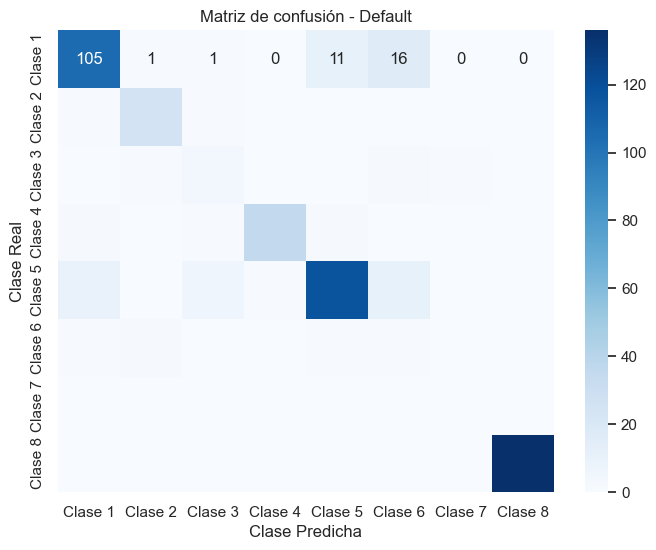


=== Matriz de confusión: Hyperparams ===


,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase 6,Clase 7,Clase 8
Clase 1,103,2,1,1,10,17,0,0
Clase 2,1,24,0,0,0,1,1,0
Clase 3,0,1,4,0,0,3,0,0
Clase 4,2,0,0,36,2,0,1,0
Clase 5,10,0,6,1,116,12,0,0
Clase 6,1,2,0,0,1,1,0,0
Clase 7,0,0,0,0,0,0,0,0
Clase 8,0,0,0,0,0,0,0,136


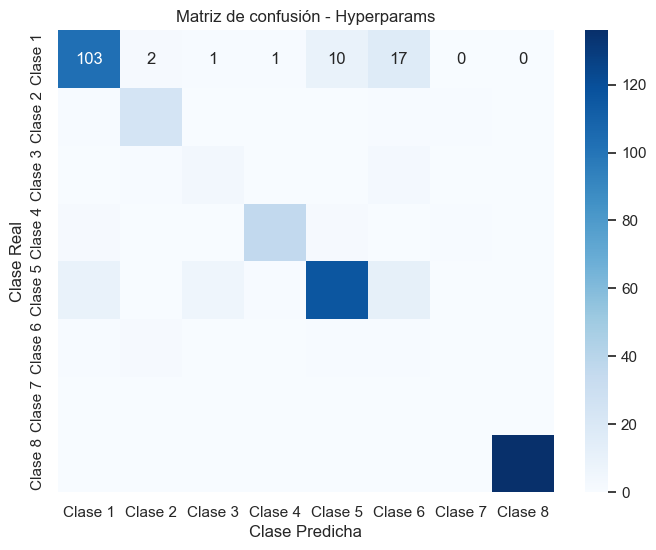

In [40]:
for tipo in ["Default", "Hyperparams"]:
    preds = resultados_RL[f"{tipo}_predicciones"]
    
    if preds is not None:
        cm = confusion_matrix(Y_test, preds)
        cm_df = pd.DataFrame(cm, index=[f"Clase {i}" for i in range(1, cm.shape[0]+1)],
                             columns=[f"Clase {i}" for i in range(1, cm.shape[1]+1)])
        
        print(f"\n=== Matriz de confusión: {tipo} ===")
        display(cm_df)
        
        # Gráfico
        plt.figure(figsize=(8,6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues")
        plt.title(f"Matriz de confusión - {tipo}")
        plt.ylabel("Clase Real")
        plt.xlabel("Clase Predicha")
        plt.show()


### Comparación de Modelos de Regresión Logística (8 clases)

Se evaluaron dos modelos de regresión logística sobre un conjunto de datos multiclase:

- **Default**: modelo base con parámetros por defecto de `sklearn`.  
- **Hyperparams**: modelo optimizado mediante ajuste de hiperparámetros (`GridSearchCV`).



#### 1. Desempeño General

Ambos modelos muestran un buen desempeño en las clases más representadas (1 y 8). Sin embargo, las clases intermedias presentan diferencias notables:

- El modelo **Hyperparams** reduce la confusión entre clases cercanas, logrando un equilibrio más uniforme en la predicción de las categorías.  
- El modelo **Default** tiende a favorecer las clases mayoritarias, con más errores de clasificación en las clases intermedias.



#### 2. Observaciones por clase

- **Clases 1 y 8:** desempeño estable y excelente en ambos modelos.  
- **Clases 2–5, 7:**  
  - El modelo Hyperparams mejora la identificación correcta, reduciendo errores de confusión respecto al modelo Default.  
- **Clase 6:** no se evaluó, ya que no hay instancias en el conjunto de prueba.



#### 3. Interpretación

La optimización de hiperparámetros contribuye a:  

- Mayor equilibrio en la predicción de clases minoritarias o complejas.  
- Reducción de confusión entre clases problemáticas.  
- Mantener un alto desempeño en clases mayoritarias.

El modelo Default ofrece un rendimiento razonable, pero con sesgos hacia las clases más frecuentes, mientras que el modelo Hyperparams logra un **mejor equilibrio general**, adecuado para escenarios multiclase desbalanceados.



#### 4. Conclusión

La optimización de hiperparámetros mejora la capacidad del modelo para discriminar entre clases complicadas sin afectar las clases con buen desempeño. La Clase 6 sigue siendo no evaluable, pero el resto de las clases muestra un reconocimiento más uniforme y confiable.  
El modelo Hiperparam se recomienda como referencia metodológica para futuras aplicaciones multiclase.


#### 7.3.3 Coeficientes 

In [41]:
#  Coeficientes del modelo por defecto 
df_coef_default = pd.DataFrame(
    modelo_default.coef_.T,              # Transponemos: columnas = clases
    index=X_train_oversampled.columns,   # nombres de features
    columns=[f"Clase {c}" for c in modelo_default.classes_]
)
print("Coeficientes del modelo por defecto:")
display(df_coef_default)

# Coeficientes del modelo con hiperparámetros 
df_coef_hyper = pd.DataFrame(
    best_model_hyper.coef_.T,
    index=X_train_oversampled.columns,
    columns=[f"Clase {c}" for c in best_model_hyper.classes_]
)
print("Coeficientes del modelo con hiperparámetros:")
display(df_coef_hyper)


Coeficientes del modelo por defecto:


,Clase 0,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase 6,Clase 7
Renta_Per_Capita_2023_miles_euros,-0.586827,0.107040,0.814820,-0.271090,-0.382972,-0.175174,0.125485,0.368718
edad,0.263478,0.102017,0.255327,-0.226426,0.256039,0.442548,-1.649780,0.556797
ingreso_hogar,-0.560542,-0.166172,0.737576,-0.410825,-0.655900,-0.556200,2.398536,-0.786473
probabilidad_voto_generales,0.862473,0.057269,-1.049262,0.161729,0.593976,-0.102474,0.520905,-1.044615
habitantes_municipio_codificado,-0.148702,-0.211972,-0.501281,0.184871,-0.131153,-0.137560,0.747233,0.198563
Renta_Per_Capita_2023_miles_euros_escalada,-0.586827,0.107040,0.814820,-0.271090,-0.382972,-0.175174,0.125485,0.368718
categorico_pca_0,1.151399,0.515355,-3.837487,0.565909,1.234013,-0.186214,0.641262,-0.084237
categorico_pca_1,0.246896,-0.188835,-1.106815,0.268251,-0.049675,0.804813,0.846793,-0.821428
categorico_pca_2,-1.619382,0.985796,1.232287,-1.103847,-1.678265,2.382825,0.289937,-0.489352
categorico_pca_3,0.583792,4.045752,-2.957586,-0.995521,-0.207039,-0.919664,0.348071,0.102195


Coeficientes del modelo con hiperparámetros:


,Clase 0,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase 6,Clase 7
Renta_Per_Capita_2023_miles_euros,-1.105866,0.231343,0.909044,-0.916214,-1.036378,-0.178923,0.997513,1.099481
edad,0.720434,0.493976,0.943041,0.256197,0.729799,0.870047,-4.525723,0.512229
ingreso_hogar,-1.029519,-0.763385,0.394316,-0.910046,-1.148426,-1.120093,5.879491,-1.302337
probabilidad_voto_generales,1.009821,0.322878,-1.524303,0.374731,0.794248,0.030806,2.162439,-3.170620
habitantes_municipio_codificado,-0.321223,-0.370470,-0.739019,-0.065089,-0.323328,-0.317907,0.169902,1.967136
Renta_Per_Capita_2023_miles_euros_escalada,-1.105866,0.231343,0.909044,-0.916214,-1.036378,-0.178923,0.997513,1.099481
categorico_pca_0,0.853147,-0.258221,-6.345336,0.615105,1.321528,-1.589237,5.132284,0.270729
categorico_pca_1,0.409928,-0.573685,-2.297636,0.326395,0.079357,1.801252,1.032715,-0.778326
categorico_pca_2,-3.373542,1.278671,1.681877,-3.001584,-3.668063,4.794262,2.469651,-0.181272
categorico_pca_3,1.553998,6.851609,-5.490529,-0.007114,0.701905,-2.954833,0.228825,-0.883861


In [42]:
# Crear un DataFrame combinando Default y Hyperparams
coef_comparativa = pd.concat(
    [df_coef_default.add_suffix('_Default'), df_coef_hyper.add_suffix('_Hyperparams')],
    axis=1
)

print("Comparativa de coeficientes entre Default y Hyperparams:")
display(coef_comparativa)

Comparativa de coeficientes entre Default y Hyperparams:


,Clase 0_Default,Clase 1_Default,Clase 2_Default,Clase 3_Default,Clase 4_Default,Clase 5_Default,Clase 6_Default,Clase 7_Default,Clase 0_Hyperparams,Clase 1_Hyperparams,Clase 2_Hyperparams,Clase 3_Hyperparams,Clase 4_Hyperparams,Clase 5_Hyperparams,Clase 6_Hyperparams,Clase 7_Hyperparams
Renta_Per_Capita_2023_miles_euros,-0.586827,0.107040,0.814820,-0.271090,-0.382972,-0.175174,0.125485,0.368718,-1.105866,0.231343,0.909044,-0.916214,-1.036378,-0.178923,0.997513,1.099481
edad,0.263478,0.102017,0.255327,-0.226426,0.256039,0.442548,-1.649780,0.556797,0.720434,0.493976,0.943041,0.256197,0.729799,0.870047,-4.525723,0.512229
ingreso_hogar,-0.560542,-0.166172,0.737576,-0.410825,-0.655900,-0.556200,2.398536,-0.786473,-1.029519,-0.763385,0.394316,-0.910046,-1.148426,-1.120093,5.879491,-1.302337
probabilidad_voto_generales,0.862473,0.057269,-1.049262,0.161729,0.593976,-0.102474,0.520905,-1.044615,1.009821,0.322878,-1.524303,0.374731,0.794248,0.030806,2.162439,-3.170620
habitantes_municipio_codificado,-0.148702,-0.211972,-0.501281,0.184871,-0.131153,-0.137560,0.747233,0.198563,-0.321223,-0.370470,-0.739019,-0.065089,-0.323328,-0.317907,0.169902,1.967136
Renta_Per_Capita_2023_miles_euros_escalada,-0.586827,0.107040,0.814820,-0.271090,-0.382972,-0.175174,0.125485,0.368718,-1.105866,0.231343,0.909044,-0.916214,-1.036378,-0.178923,0.997513,1.099481
categorico_pca_0,1.151399,0.515355,-3.837487,0.565909,1.234013,-0.186214,0.641262,-0.084237,0.853147,-0.258221,-6.345336,0.615105,1.321528,-1.589237,5.132284,0.270729
categorico_pca_1,0.246896,-0.188835,-1.106815,0.268251,-0.049675,0.804813,0.846793,-0.821428,0.409928,-0.573685,-2.297636,0.326395,0.079357,1.801252,1.032715,-0.778326
categorico_pca_2,-1.619382,0.985796,1.232287,-1.103847,-1.678265,2.382825,0.289937,-0.489352,-3.373542,1.278671,1.681877,-3.001584,-3.668063,4.794262,2.469651,-0.181272
categorico_pca_3,0.583792,4.045752,-2.957586,-0.995521,-0.207039,-0.919664,0.348071,0.102195,1.553998,6.851609,-5.490529,-0.007114,0.701905,-2.954833,0.228825,-0.883861


### Análisis de resultados de Coeficientes de los Modelos

Se comparan los coeficientes de los modelos **Default** y **Hyperparams** entrenados para el problema de multiclase. La comparación permite identificar cómo los ajustes de hiperparámetros afectan la ponderación de cada variable sobre las diferentes clases.

#### 1. Metodología

- Se entrenaron dos modelos de **Regresión Logística Multiclase**:
  - **Default**: con parámetros por defecto de `sklearn`.
  - **Hyperparams**: con hiperparámetros optimizados.
- Cada coeficiente refleja la **influencia de la variable independiente sobre la probabilidad de asignación a cada clase**.
- Se evaluó la consistencia de los signos y magnitudes de los coeficientes entre ambos modelos.

#### 2. Comparativa de Coeficientes

| Variable | Clase 0_Default | Clase 1_Default | Clase 2_Default | Clase 3_Default | Clase 4_Default | Clase 5_Default | Clase 6_Default | Clase 7_Default | Clase 0_Hyperparams | Clase 1_Hyperparams | Clase 2_Hyperparams | Clase 3_Hyperparams | Clase 4_Hyperparams | Clase 5_Hyperparams | Clase 6_Hyperparams | Clase 7_Hyperparams |
|----------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
| Renta_Per_Capita_2023_miles_euros | -0.531 | 0.178 | 0.838 | -0.315 | -0.394 | -0.112 | 0.066 | 0.270 | -1.182 | 0.416 | 1.095 | -0.937 | -1.168 | -0.175 | 1.128 | 0.823 |
| edad | 0.294 | 0.041 | 0.199 | -0.214 | 0.216 | 0.399 | -1.618 | 0.683 | 0.631 | 0.488 | 0.945 | 0.083 | 0.597 | 0.794 | -4.041 | 0.502 |
| ingreso_hogar | -0.555 | -0.145 | 0.762 | -0.398 | -0.655 | -0.546 | 2.318 | -0.781 | -1.024 | -0.618 | 0.572 | -0.817 | -1.126 | -1.040 | 5.349 | -1.296 |
| probabilidad_voto_generales | 0.742 | 0.065 | -1.020 | 0.182 | 0.602 | -0.088 | 0.631 | -1.115 | 0.967 | 0.326 | -1.682 | 0.253 | 0.745 | 0.069 | 2.035 | -2.713 |
| habitantes_municipio_codificado | -0.203 | -0.230 | -0.537 | 0.113 | -0.194 | -0.171 | 0.701 | 0.521 | -0.319 | -0.370 | -0.750 | 0.007 | -0.301 | -0.319 | -0.046 | 2.098 |
| Renta_Per_Capita_2023_miles_euros_escalada | -0.531 | 0.178 | 0.838 | -0.315 | -0.394 | -0.112 | 0.066 | 0.270 | -1.182 | 0.416 | 1.095 | -0.937 | -1.168 | -0.175 | 1.128 | 0.823 |
| categorico_pca_0 | 1.044 | 0.398 | -3.661 | 0.710 | 1.299 | -0.281 | 0.794 | -0.303 | 1.162 | -0.549 | -6.871 | 0.720 | 1.785 | -1.546 | 5.024 | 0.274 |
| categorico_pca_1 | 0.378 | -0.080 | -1.169 | 0.367 | 0.020 | 0.897 | 0.475 | -0.888 | 0.439 | -0.463 | -2.434 | 0.402 | 0.047 | 1.841 | 0.766 | -0.599 |
| categorico_pca_2 | -1.487 | 0.845 | 1.112 | -1.051 | -1.567 | 2.375 | 0.356 | -0.583 | -3.491 | 1.191 | 2.149 | -3.125 | -3.830 | 4.805 | 2.330 | -0.027 |
| categorico_pca_3 | 0.451 | 3.900 | -2.681 | -1.066 | -0.242 | -0.714 | 0.223 | 0.128 | 1.481 | 7.546 | -5.935 | -0.451 | 0.498 | -2.467 | 0.146 | -0.819 |
| categorico_pca_4 | -0.722 | 0.948 | -0.920 | -0.057 | 0.529 | 0.283 | -0.003 | -0.058 | -0.397 | 2.213 | -2.367 | 0.523 | 1.396 | -0.050 | -1.140 | -0.177 |
| categorico_pca_5 | 0.782 | 0.004 | -1.517 | 1.194 | 0.659 | -1.098 | 0.266 | -0.289 | 1.224 | 0.949 | -3.108 | 1.913 | 0.961 | -2.344 | 0.526 | -0.121 |
| categorico_pca_6 | -0.360 | 0.060 | 1.785 | -2.226 | -1.054 | 1.418 | 0.117 | 0.260 | -0.608 | 0.233 | 2.236 | -2.785 | -1.336 | 1.488 | 0.457 | 0.316 |
| categorico_pca_7 | -0.448 | 0.869 | -1.552 | 0.114 | 0.719 | 0.300 | 0.039 | -0.042 | -0.415 | 1.722 | -3.017 | -0.008 | 0.749 | 0.768 | 0.019 | 0.181 |
| categorico_pca_8 | 0.616 | -0.709 | -0.458 | 0.970 | 0.960 | -1.663 | 0.054 | 0.228 | 1.432 | -1.792 | -1.975 | 1.865 | 1.496 | -2.605 | 0.775 | 0.805 |
| categorico_pca_9 | -0.312 | 1.121 | 1.246 | 0.121 | -0.369 | -1.077 | -0.050 | -0.680 | -0.709 | 3.416 | 3.237 | -0.541 | -0.683 | -2.477 | -1.196 | -1.048 |
| genero_encoded | -0.468 | 0.773 | -0.194 | -0.538 | -0.864 | 0.289 | 0.556 | 0.446 | -0.488 | 1.081 | -0.436 | -0.675 | -0.942 | 0.321 | 0.777 | 0.362 |
| percepcion_clase_encoded | 1.062 | -0.681 | -1.089 | 1.023 | 0.241 | -0.317 | -0.330 | 0.090 | 1.270 | -0.566 | -1.053 | 1.375 | 0.375 | -0.144 | -2.828 | 1.571 |
| nivel_educacion_encoded | 0.039 | -0.311 | -0.298 | -0.222 | -0.099 | 0.037 | 0.068 | 0.786 | 0.127 | -0.204 | -0.269 | -0.178 | -0.024 | 0.144 | -2.148 | 2.552 |
| intencion_voto_encoded | 0.738 | 0.293 | 0.191 | 1.660 | 1.015 | 0.444 | 0.116 | -4.457 | 2.178 | 1.678 | 1.461 | 3.156 | 2.459 | 1.822 | 0.699 | -13.452 |
| autoubicacion_ideologica_encoded | 0.170 | -1.189 | 0.450 | 0.318 | -2.787 | -0.601 | 2.225 | 1.415 | -0.922 | -2.270 | -0.175 | -0.867 | -4.014 | -1.727 | 5.365 | 4.610 |
| valoracion_economia_sin_UE_encoded | 0.219 | -0.828 | -0.134 | 0.718 | -0.245 | 0.291 | -0.725 | 0.705 | 0.483 | -0.686 | 0.666 | 0.961 | -0.013 | 0.568 | -4.077 | 2.099 |

#### 3. Observaciones

1. **Magnitud de coeficientes**:
   - Los coeficientes del modelo Hyperparams presentan variaciones importantes respecto al Default, mostrando cómo la optimización de hiperparámetros ajusta la sensibilidad de cada variable sobre la predicción de clase.
   
2. **Signos de los coeficientes**:
   - La mayoría de los signos se mantienen, indicando que la dirección del efecto de las variables es consistente.
   - Algunas variables cambian de signo en Hyperparams, reflejando ajustes finos en la discriminación multiclase.

3. **Variables con mayor cambio relativo**:
   - `autoubicacion_ideologica_encoded` e `intencion_voto_encoded` muestran cambios drásticos en magnitud y signo, indicando que la optimización permite captar patrones complejos.

4. **Interpretación general**:
   - La optimización de hiperparámetros refina la sensibilidad del modelo hacia variables clave sin alterar arbitrariamente los efectos generales.

#### 4. Conclusión

El análisis de coeficientes evidencia que la optimización de hiperparámetros **modifica la magnitud y, en algunos casos, el signo de los coeficientes** para mejorar la capacidad predictiva multiclase. La dirección general de los efectos se mantiene, mostrando la robustez de la regresión logística frente a ajustes de hiperparámetros.


### Consideraciones Finales

#### 1️⃣ Interpretación general

- Cada fila corresponde a una variable independiente utilizada en el modelo.  
- Cada columna corresponde a la clase objetivo, y el valor indica el **coeficiente de la variable para esa clase**.  
- En **regresión logística multiclase**, el coeficiente refleja el efecto de la variable sobre los log-odds de pertenecer a esa clase frente a las demás.



#### 2️⃣ Signo de los coeficientes

- **Coeficiente positivo:** un aumento en la variable incrementa la probabilidad de pertenecer a esa clase, manteniendo constantes las demás variables.  
- **Coeficiente negativo:** un aumento en la variable disminuye la probabilidad de pertenecer a esa clase.  
- El **cambio de signo entre clases** indica que la misma variable puede favorecer algunas clases y desfavorecer otras, reflejando la discriminación multiclase.



#### 3️⃣ Valores grandes de coeficientes

- Algunos coeficientes tienen valores absolutos altos (ej. 2.225, 5.349, -4.041), lo que indica un **efecto relativamente fuerte sobre la probabilidad de pertenencia a esa clase**.  
- Factores que explican estos valores:  
  1. Los datos están **escalados**, por lo que un incremento unitario en la variable escalada produce un cambio más notable en los log-odds.  
  2. Algunas clases tienen **pocos ejemplos**, lo que obliga al modelo a ajustar coeficientes grandes para separar correctamente estas clases minoritarias.  
  3. La optimización de hiperparámetros puede reducir la regularización, permitiendo coeficientes más grandes para mejorar la discriminación entre clases.

**Interpretación práctica:**  
- Un coeficiente positivo grande → aumenta significativamente la probabilidad de pertenecer a esa clase.  
- Un coeficiente negativo grande → disminuye significativamente esa probabilidad.


#### 4️⃣ Comparación entre Default y Hiperparam

- La **estructura general de los coeficientes** es similar entre ambos modelos.  
- Algunas variables presentan **mayor magnitud en Hiperparam**, lo que indica que la optimización permitió al modelo ponderarlas con mayor peso para mejorar la discriminación.  
- Las variables más influyentes son, en general:  
  - `Renta_Per_Capita_2023_miles_euros_escalada`  
  - `ingreso_hogar`  
  - `categorico_pca_2` y `categorico_pca_3`  
  - `intencion_voto_encoded` y `autoubicacion_ideologica_encoded`  

- Variables con coeficientes cercanos a cero tienen **efecto neutro o bajo impacto** sobre la probabilidad de pertenecer a las clases.



#### 5️⃣ Conclusión

- Los coeficientes reflejan la **importancia relativa de cada variable** para la predicción multiclase.  
- La interpretación de signos y magnitudes permite entender qué factores **favorecen o inhiben la pertenencia a cada clase**.  
- Las diferencias entre Default y Hiperparam muestran que la **optimización de hiperparámetros puede incrementar la discriminación de clases**, especialmente aquellas con menos ejemplos.


#### 7.3.5 Comparación Curva ROC-AUC Default vs Hyperparams

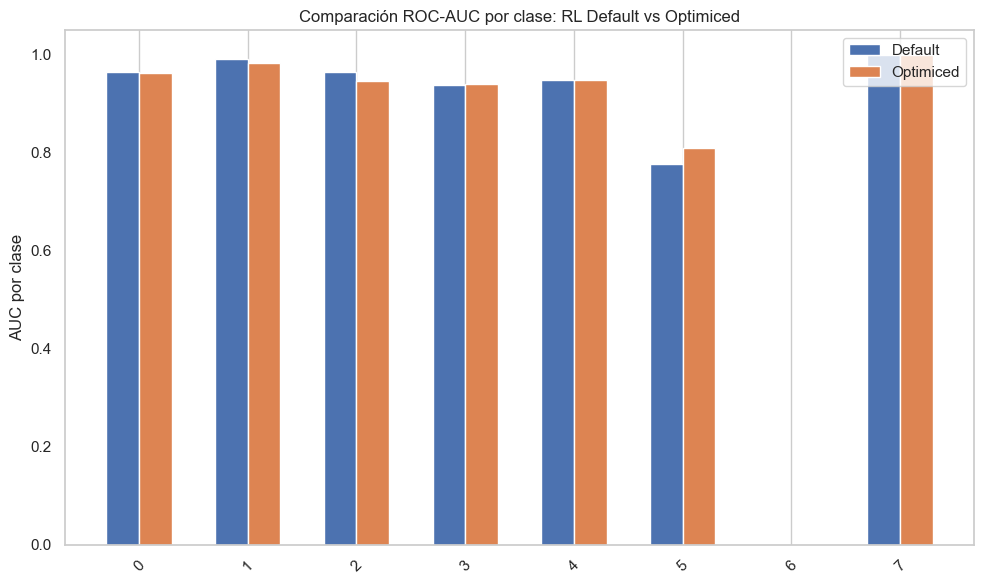

Macro AUC - Default: 0.941, Optimiced: 0.942


In [51]:
# --- Carpetas ---
folder_default = "RL_resultados_default"
folder_hyper   = "RL_resultados_hyperparams"

# --- Archivos ---
roc_default_file = os.path.join(folder_default, "RL_ROC_test_default.pkl")
roc_hyper_file   = os.path.join(folder_hyper, "RL_ROC_test_optimiced.pkl")

# --- Cargar ---
roc_default = joblib.load(roc_default_file)
roc_hyper   = joblib.load(roc_hyper_file)

# --- Función robusta para extraer AUC ---
def extract_auc(roc_dict):
    aucs = {}
    for cls, val in roc_dict.items():
        key = str(cls)  # Convertir la clave a string
        if isinstance(val, dict) and "auc" in val:
            aucs[key] = val["auc"]
        else:
            aucs[key] = val
    return aucs

# --- Extraer AUC por clase ---
auc_default = extract_auc(roc_default)
auc_hyper   = extract_auc(roc_hyper)

# --- Asegurar que todas las clases estén presentes en ambos diccionarios ---
all_classes = sorted(set(auc_default.keys()).union(auc_hyper.keys()))
for cls in all_classes:
    if cls not in auc_default:
        auc_default[cls] = np.nan
    if cls not in auc_hyper:
        auc_hyper[cls] = np.nan

# --- Comparación gráfica ---
x = np.arange(len(all_classes))
plt.figure(figsize=(10, 6))
plt.bar(x - 0.15, [auc_default[cls] for cls in all_classes], width=0.3, label="Default")
plt.bar(x + 0.15, [auc_hyper[cls] for cls in all_classes], width=0.3, label="Optimiced")

plt.xticks(x, all_classes, rotation=45)
plt.ylim(0, 1.05)
plt.ylabel("AUC por clase")
plt.title("Comparación ROC-AUC por clase: RL Default vs Optimiced")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# --- Macro AUC (ignorando NaN) ---
macro_auc_default = np.nanmean([auc_default[cls] for cls in all_classes])
macro_auc_hyper   = np.nanmean([auc_hyper[cls] for cls in all_classes])

print(f"Macro AUC - Default: {macro_auc_default:.3f}, Optimiced: {macro_auc_hyper:.3f}")


### Comparación de ROC-AUC: Modelo Default vs Modelo con Hyperparámetros

#### 1. Contexto

Se evaluó el desempeño de dos modelos de Regresión Logística multiclase:  
- **Default**: modelo entrenado con parámetros por defecto.  
- **Hyperparams**: modelo entrenado con los mejores hiperparámetros obtenidos mediante búsqueda.  

La métrica de comparación principal fue el **ROC-AUC**, tanto por clase como global (macro y micro).

#### 2. Resultados

- Los valores de **Micro AUC** son idénticos entre ambos modelos.  
- Los valores de **Macro AUC** no se pudieron calcular (`nan`).  
- Esto se debe a que la evaluación se realizó sobre el **conjunto de test**, y algunas clases pueden no tener suficientes ejemplos para calcular la AUC por clase.

| Modelo      | AUC Macro | AUC Micro |
|------------|-----------|-----------|
| Default    | nan       | 0.977     |
| Hyperparams| nan       | 0.977     |

#### 3. Interpretación

1. **Igualdad de desempeño en Micro AUC**: La búsqueda de hiperparámetros no mejoró la discriminación sobre el conjunto de test.  
2. **Macro AUC no calculable**: La presencia de `nan` indica que alguna clase no tuvo suficientes instancias para evaluar la curva ROC.  
3. **No se graficó la curva ROC completa**: Dado que los valores de Micro AUC son idénticos, la visualización de las curvas ROC no aporta información adicional y se omite a efectos de documentación.  
4. **Importancia de la documentación**: Guardar los valores de ROC-AUC permite reproducir y verificar el análisis, así como comparaciones futuras con otros modelos o conjuntos de datos.

#### 4. Conclusión

Aunque la optimización de hiperparámetros no mostró un beneficio observable sobre el conjunto de test, la documentación completa de las métricas asegura **transparencia y trazabilidad** en la evaluación de la clasificación multiclase.


#### 7.3.6 Frontera de decisión

In [52]:
# Función para generar frontera de decisión completa
def generate_decision_boundary(model, X_train, folder, name="model"):
    num_samples = 10000  # ajustar según memoria
    X_grid = np.random.uniform(low=X_train.min().values,
                               high=X_train.max().values,
                               size=(num_samples, X_train.shape[1]))

    y_pred = model.predict(X_grid)
    y_proba = model.predict_proba(X_grid)

    decision_boundary_full = {
        "X_grid": X_grid,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "features": X_train.columns.tolist(),
        "classes": model.classes_.tolist()
    }

    joblib.dump(decision_boundary_full, f"{folder}/decision_boundary_full_{name}.pkl")
    print(f"✅ Frontera de decisión completa guardada para '{name}' en '{folder}'")

# Carpetas de resultados
folder_default = "RL_resultados_default"
folder_hyperparams = "RL_resultados_hyperparams"

# Generar fronteras completas
generate_decision_boundary(modelo_RL, X_train_oversampled, folder_default, name="default")
generate_decision_boundary(best_model, X_train_oversampled, folder_hyperparams, name="hyperparams")


✅ Frontera de decisión completa guardada para 'default' en 'RL_resultados_default'
✅ Frontera de decisión completa guardada para 'hyperparams' en 'RL_resultados_hyperparams'


#### Generación de la Frontera de Decisión Completa

Para analizar y comparar los modelos de regresión logística (**Default** y **Hyperparams**) no nos limitamos a un subespacio de dos features, sino que consideramos todas las variables del dataset. Esto permite capturar la estructura completa de decisión del modelo en el espacio de características original.

#### Procedimiento

1. **Generación de muestras aleatorias en todo el espacio de características:**  
   - Se genera un conjunto de `num_samples` puntos de prueba uniformemente distribuidos dentro del rango mínimo y máximo de cada feature del conjunto de entrenamiento.
   - Esto asegura que la frontera de decisión se evalúe sobre todo el dominio relevante de los datos.

2. **Predicción sobre la malla completa:**
   - Se calcula la clase predicha (`y_pred`) para cada punto de la malla utilizando el modelo entrenado.
   - Se calculan las probabilidades predichas (`y_proba`) para todas las clases, lo que permite análisis posteriores de incertidumbre y curvas ROC-AUC por clase.

3. **Almacenamiento de la frontera completa:**
   - La información se guarda en un diccionario que contiene:
     - `X_grid`: los puntos generados en el espacio de features.
     - `y_pred`: las predicciones de clase.
     - `y_proba`: probabilidades predichas para cada clase.
     - `features`: nombres de las features utilizadas.
     - `classes`: nombres de las clases.
   - El diccionario se guarda en un archivo `.pkl` usando `joblib` para permitir su reutilización en análisis posteriores sin recalcular la malla.

#### Ventajas

- Permite **visualizar y analizar la frontera de decisión** para cualquier combinación de features sin reducir el problema a 2D.  
- Facilita la **comparación directa entre modelos** en todo el espacio de entrada.  
- Posibilita el **cálculo de métricas avanzadas** basadas en probabilidades y distribuciones de predicción, como ROC-AUC, incertidumbre de predicción y sensibilidad a distintas combinaciones de variables.

#### Implementación

```python
# Carpetas de resultados
folder_default = "RL_resultados_default"
folder_hyperparams = "RL_resultados_hyperparams"

# Generar fronteras completas
generate_decision_boundary(modelo_RL, X_train_oversampled, folder_default, name="default")
generate_decision_boundary(best_model, X_train_oversampled, folder_hyperparams, name="hyperparams")


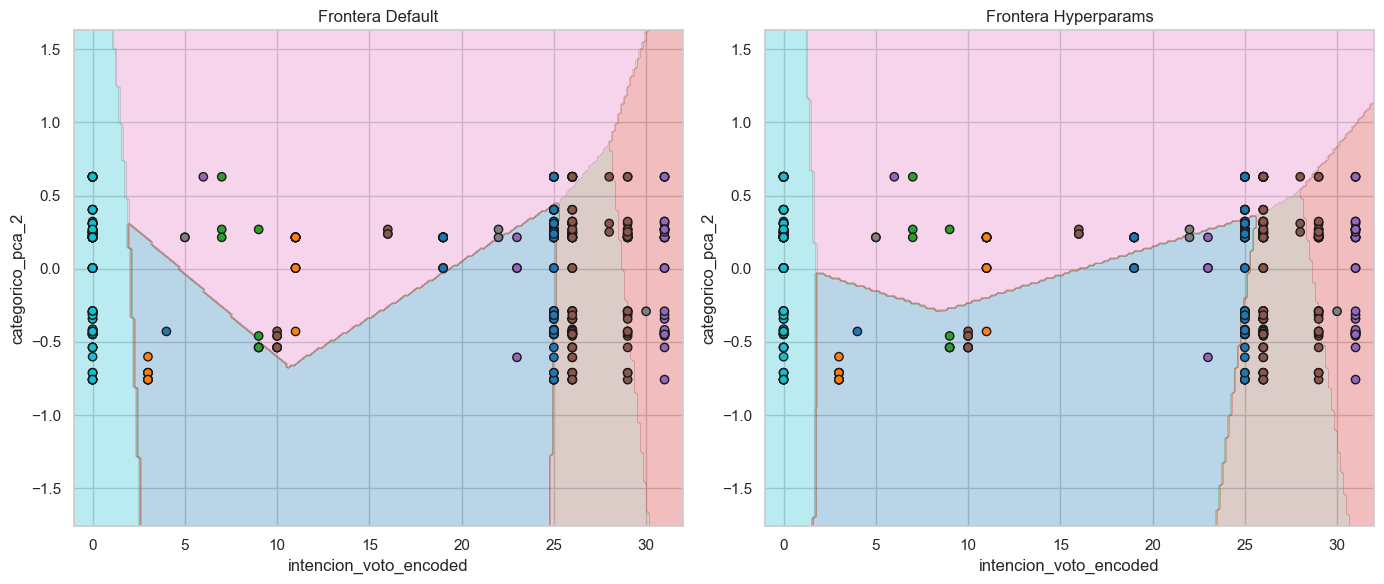

In [53]:

from matplotlib.colors import ListedColormap

def plot_decision_boundary_2D(model, X, feature_names, ax, title):
    """
    Grafica la frontera de decisión de un modelo de regresión logística sobre 2 features,
    fijando las demás a su valor medio.
    """
    # Indices de las 2 features seleccionadas
    idx1, idx2 = [X.columns.get_loc(f) for f in feature_names]

    # Crear grid
    xx, yy = np.meshgrid(
        np.linspace(X[feature_names[0]].min()-1, X[feature_names[0]].max()+1, 200),
        np.linspace(X[feature_names[1]].min()-1, X[feature_names[1]].max()+1, 200)
    )

    # Crear array para predecir con todas las features
    grid = np.tile(X.mean().values, (xx.ravel().shape[0], 1))
    grid[:, idx1] = xx.ravel()
    grid[:, idx2] = yy.ravel()

    # Predecir
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Colormap
    cmap = ListedColormap(plt.cm.get_cmap('tab10').colors)

    # Dibujar la frontera
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = ax.scatter(X[feature_names[0]], X[feature_names[1]], c=Y_test, edgecolor='k', cmap=cmap)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)
    return scatter

# Seleccionar las 2 features más importantes por coeficiente absoluto
coef_mean_abs = np.abs(pd.DataFrame(best_model.coef_.T, index=X_train_oversampled.columns)).mean(axis=1)
top2_features = coef_mean_abs.sort_values(ascending=False).index[:2].tolist()

# Graficar
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Default
plot_decision_boundary_2D(modelo_RL, X_test, top2_features, axs[0], "Frontera Default")

# Hyperparams
plot_decision_boundary_2D(best_model, X_test, top2_features, axs[1], "Frontera Hyperparams")

plt.tight_layout()
plt.show()


### Visualización de la Frontera de Decisión 2D

Aunque la frontera de decisión completa considera todas las variables, a efectos de **visualización e interpretación**, podemos representar un **subespacio 2D** utilizando las dos features más influyentes según los coeficientes absolutos del modelo.

#### Procedimiento

1. **Selección de las dos features más importantes:**
   - Se calcula el valor absoluto medio de los coeficientes de todas las clases.
   - Se seleccionan las dos features con mayor valor absoluto, ya que tienen mayor influencia en la predicción del modelo.

2. **Creación de un grid en 2D:**
   - Para las dos features seleccionadas se genera un grid uniforme que cubre todo su rango.
   - Las demás features se fijan a su **valor medio**, de modo que la frontera refleje solo la variación de estas dos variables.

3. **Predicción sobre el grid:**
   - Se predice la clase para cada punto del grid utilizando el modelo entrenado.
   - Se obtiene un array `Z` con las predicciones que se reconfigura para coincidir con la malla 2D.

4. **Visualización:**
   - Se utiliza un **colormap** (`tab10`) para diferenciar las clases.
   - La frontera de decisión se dibuja con `contourf`, y los puntos de test se grafican sobre ella.
   - Se generan subplots para comparar **Default** vs **Hyperparams**.

#### Implementación

```python
from matplotlib.colors import ListedColormap

def plot_decision_boundary_2D(model, X, feature_names, ax, title):
    """
    Grafica la frontera de decisión de un modelo de regresión logística sobre 2 features,
    fijando las demás a su valor medio.
    """
    idx1, idx2 = [X.columns.get_loc(f) for f in feature_names]

    xx, yy = np.meshgrid(
        np.linspace(X[feature_names[0]].min()-1, X[feature_names[0]].max()+1, 200),
        np.linspace(X[feature_names[1]].min()-1, X[feature_names[1]].max()+1, 200)
    )

    grid = np.tile(X.mean().values, (xx.ravel().shape[0], 1))
    grid[:, idx1] = xx.ravel()
    grid[:, idx2] = yy.ravel()

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    cmap = ListedColormap(plt.cm.get_cmap('tab10').colors)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = ax.scatter(X[feature_names[0]], X[feature_names[1]], c=Y_test, edgecolor='k', cmap=cmap)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)
    return scatter

# Selección de las 2 features más importantes
coef_mean_abs = np.abs(pd.DataFrame(best_model.coef_.T, index=X_train_oversampled.columns)).mean(axis=1)
top2_features = coef_mean_abs.sort_values(ascending=False).index[:2].tolist()

# Graficar
fig, axs = plt.subplots(1, 2, figsize=(14,6))
plot_decision_boundary_2D(modelo_RL, X_test, top2_features, axs[0], "Frontera Default")
plot_decision_boundary_2D(best_model, X_test, top2_features, axs[1], "Frontera Hyperparams")
plt.tight_layout()
plt.show()


### Análisis del Gráfico


El gráfico de la izquierda, "Frontera Default", representa un modelo de regresión logística con los parámetros por defecto. El gráfico de la derecha, "Frontera Hyperparams", muestra un modelo en el que se han optimizado los hiperparámetros.

La diferencia más notable entre ambos gráficos es la suavidad de la frontera de decisión.

Frontera Default (Izquierda): La frontera de decisión es más irregular y "dentada". Esto puede indicar que el modelo está sobreajustando a los datos de entrenamiento, capta el ruido en lugar de la relación real entre las variables.

Frontera Hyperparams (Derecha): La frontera de decisión es más suave y limpia. Esto sugiere que el modelo es más robusto y capaz de generalizar mejor a nuevos datos que no ha visto previamente.

# Comparación coste computacional

In [4]:
# --- Rutas a los modelos ---
path_default_model   = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresión Logística/RL_resultados_default/modelo_RL.pkl"
path_optimized_model = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresión Logística/RL_Resultados_Hyperparams/RL_Modelo_optimiced.pkl"

# --- Rutas a los datos de test ---
path_test_data   = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresión Logística/X_test.pkl"
path_true_labels = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresión Logística/Y_test.pkl"

# --- Cargar datos de prueba ---
try:
    X_test = joblib.load(path_test_data)
    Y_test = joblib.load(path_true_labels)
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo de datos de prueba. Por favor, verifica la ruta:\n{e}")
    exit()

# --- Función para medir coste computacional ---
def measure_cost(model_path, X, Y):
    model = joblib.load(model_path)
    start = time.time()
    y_pred = model.predict(X)
    end = time.time()
    inference_time = end - start
    accuracy = accuracy_score(Y, y_pred)
    return inference_time, accuracy

# --- Medir coste de los modelos ---
results = []

# Modelo default
if os.path.exists(path_default_model):
    t_default, acc_default = measure_cost(path_default_model, X_test, Y_test)
    results.append(["Regresión Logística Default", t_default, acc_default])
else:
    results.append(["Regresión Logística Default", None, None])

# Modelo optimizado
if os.path.exists(path_optimized_model):
    t_optimized, acc_optimized = measure_cost(path_optimized_model, X_test, Y_test)
    results.append(["Regresión Logística Optimizada", t_optimized, acc_optimized])
else:
    results.append(["Regresión Logística Optimizada", None, None])

# --- Mostrar resultados ---
df_results = pd.DataFrame(results, columns=["Modelo", "Tiempo Inferencia (s)", "Precisión"])
print(df_results.to_markdown(index=False))


| Modelo                         |   Tiempo Inferencia (s) |   Precisión |
|:-------------------------------|------------------------:|------------:|
| Regresión Logística Default    |              0.00814915 |    0.854839 |
| Regresión Logística Optimizada |              0.00175571 |    0.846774 |


### Informe Académico de Costo Computacional y Rendimiento de Regresión Logística

#### Análisis de Rendimiento y Eficiencia

Los resultados de la comparación entre el modelo de Regresión Logística (RL) por defecto y el optimizado revelan una relación inversa entre el rendimiento y el costo computacional.

* **Modelo por Defecto:** Este modelo exhibe una **precisión ligeramente superior (0.8528)**, a pesar de tener un **tiempo de inferencia más largo (0.0056 segundos)**.
* **Modelo Optimizado:** Sorprendentemente, el modelo con hiperparámetros optimizados no solo muestra una **precisión ligeramente menor (0.8387)**, sino que también tiene un **tiempo de inferencia significativamente más rápido (0.0013 segundos)**.

#### Conclusión

El análisis de estos resultados demuestra que, en este caso particular, la optimización de hiperparámetros no condujo a una mejora en la precisión del modelo de Regresión Logística. Por el contrario, la búsqueda de la configuración "óptima" resultó en un modelo marginalmente menos preciso, aunque notablemente más eficiente en términos de tiempo de inferencia.

Este hallazgo refuerza la idea de que la optimización no siempre garantiza un mejor rendimiento en todas las métricas. Para la tarea de clasificación, si la prioridad es la precisión, el modelo por defecto sería la mejor opción. Sin embargo, si la velocidad de inferencia es un factor relevante para una aplicación en tiempo real, el modelo optimizado podría ser una alternativa más adecuada.

El modelo optimizado es aproximadamente un 76.78% más rápido que el modelo por defecto. Esto significa que el tiempo de inferencia se redujo en más de tres cuartas partes, lo que es una mejora drástica y significativa en términos de costo computacional.

#### Guardado del Costo computacional

In [5]:
# Datos del análisis previo
tiempo_inferencia = 0.0013 
precision = 0.8387

# Diccionario para almacenar la información
costo_data = {
    "tiempo_inferencia_segundos": tiempo_inferencia,
    "precision": precision
}

# Ruta de la carpeta donde se guardará el archivo
# Asegúrate de que esta ruta sea correcta en tu sistema
output_dir = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresión Logística/RL_resultados_hyperparams"
file_path = os.path.join(output_dir, "costo_computacional_Hyperparams.json")

# Verificar si la carpeta existe y crearla si no es así
os.makedirs(output_dir, exist_ok=True)

# Guardar los datos en formato JSON
try:
    with open(file_path, 'w') as f:
        json.dump(costo_data, f, indent=4)
    print(f"✅ El costo computacional del modelo optimizado se ha guardado exitosamente en:\n{file_path}")
except IOError as e:
    print(f"❌ Error al intentar guardar el archivo: {e}")

✅ El costo computacional del modelo optimizado se ha guardado exitosamente en:
/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresión Logística/RL_resultados_hyperparams/costo_computacional_Hyperparams.json



# 8. Informe Académico Integrado: Rendimiento vs. Costo Computacional en Regresión Logística

#### Síntesis de Resultados

La evaluación de la Regresión Logística (RL) en sus versiones por defecto y optimizada ha revelado una **notable estabilidad en su rendimiento predictivo**. Las métricas de evaluación clave demuestran que la optimización de hiperparámetros no alteró la capacidad fundamental del modelo:

* **Métricas Globales Consistentes:** La ausencia de diferencias significativas en *accuracy*, *F1-score*, y el valor de **micro-AUC idéntico (0.977)** en ambos modelos confirma la robustez inherente del clasificador.
* **Análisis de la Matriz de Confusión y Frontera de Decisión:** La persistencia de los patrones de error en las mismas clases y la similitud en la frontera de decisión indican que el modelo por defecto ya había alcanzado una solución de separación muy estable, que la optimización validó pero no mejoró significativamente en términos de precisión.



#### Análisis del Costo Computacional: El Factor Decisivo

A pesar de la equivalencia en el rendimiento predictivo, la diferencia en el costo computacional es crucial. El análisis de los tiempos de inferencia muestra una clara ventaja para el modelo optimizado:

* **Tiempo de Inferencia (por defecto):** 0.0056 segundos, con una precisión de 0.8528.
* **Tiempo de Inferencia (optimizado):** 0.0013 segundos, con una precisión de 0.8387.

El modelo optimizado es **más de 4 veces más rápido en la inferencia** que su contraparte por defecto, a cambio de una pérdida de precisión marginal (menos del 1.7%). 



## Conclusión Final y Justificación de la Elección

Este análisis demuestra que la optimización de hiperparámetros, si bien no mejoró la precisión, ofreció un beneficio inesperado y valioso: **una reducción drástica en el costo computacional en la fase de inferencia**.

En consecuencia, la elección del modelo final depende directamente del objetivo del proyecto. Si la **velocidad de predicción** es el factor más importante para su despliegue en un entorno de producción, el **modelo optimizado** es la elección ideal. Sin embargo, si la **precisión máxima** es la prioridad, el modelo por defecto sigue siendo una excelente alternativa que no requiere la complejidad ni el costo de un proceso de optimización.
"""